<a href="https://www.kaggle.com/code/abhijitbhandari/rocket-analysis-nullval-replacement?scriptVersionId=105099258" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Required Libraries

In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

## Reading the Dataset 

In [3]:
df = pd.read_csv('../input/allrocketsfrom1957/all-rockets-from-1957.csv',na_values=np.nan).iloc[:,1:]
df.shape

(416, 13)

In [4]:
df.head()

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height
0,Tsyklon-3,Yuzhmash,https://en.wikipedia.org/wiki/Tsyklon-3,Retired,"3,032",4.10,3.0,0.0,39.0 m,NaN,0.00,NaN,NaN
1,Tsyklon-4M,Yuzhnoye,https://en.wikipedia.org/wiki/Cyclone-4M,Planned,"3,130",5.00,2.0,0.0,38.7 m,$45.0 million,0.91,4.0 m,NaN
2,Unha-2,KCST,https://en.wikipedia.org/wiki/Unha,Retired,"1,192",0.20,3.0,0.0,28.0 m,NaN,0.00,NaN,NaN
3,Unha-3,KCST,https://en.wikipedia.org/wiki/Unha,Active,"1,192",0.20,3.0,0.0,32.0 m,NaN,0.00,1.3 m,NaN
4,Vanguard,US Navy,https://en.wikipedia.org/wiki/Vanguard_(rocket),Retired,135,0.01,3.0,0.0,23.0 m,NaN,0.00,NaN,NaN


## Basic Stats from Data

<AxesSubplot:>

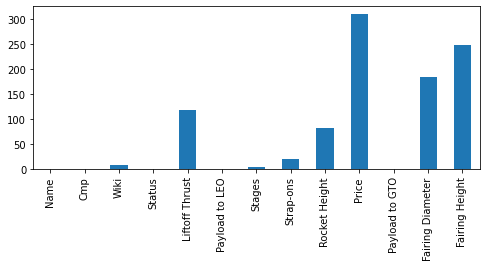

In [5]:
df.isnull().sum().plot(kind = 'bar',figsize = (8,3))

<AxesSubplot:ylabel='None'>

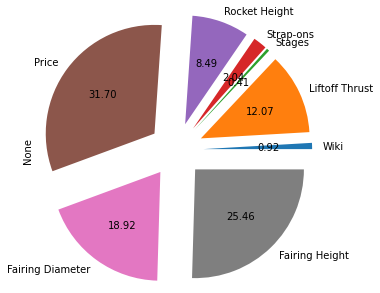

In [6]:
null = df.isnull().sum()
null = null[null>0]
explode = []
by = 0.25
for i in range(len(null)):
    explode.append(by)
explode = tuple(explode)
((null/df.shape[0])*100).plot(kind = 'pie',explode = explode,autopct = '%.2f',figsize = (5,5))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              416 non-null    object 
 1   Cmp               416 non-null    object 
 2   Wiki              407 non-null    object 
 3   Status            416 non-null    object 
 4   Liftoff Thrust    298 non-null    object 
 5   Payload to LEO    416 non-null    float64
 6   Stages            412 non-null    float64
 7   Strap-ons         396 non-null    float64
 8   Rocket Height     333 non-null    object 
 9   Price             106 non-null    object 
 10  Payload to GTO    416 non-null    float64
 11  Fairing Diameter  231 non-null    object 
 12  Fairing Height    167 non-null    object 
dtypes: float64(4), object(9)
memory usage: 42.4+ KB


In [8]:
df.describe()

,Payload to LEO,Stages,Strap-ons,Payload to GTO
count,416.000000,412.000000,396.000000,416.000000
mean,6.333250,2.757282,1.797980,1.715115
std,16.261489,0.859650,2.537735,4.219524
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.500000,3.000000,0.000000,0.000000
75%,6.645000,3.000000,4.000000,2.200000
max,140.000000,5.000000,9.000000,50.000000


**There are some redundancies in data, as stages can't be zero. Minimum number of stage is 2**

**Minimum payload value for both Geosynchronous Transfer Orbit (GTO) and Low Earth Orbit (LEO) is zero. Zero payload makes the rocket unstable as there would be no forward mass to shift the center of gravity forward. So, in those scenarios a pseudo payload is used**

**Rocket Height, Price, Fairing Diameter, Fairing Height are also numerical columns**

In [9]:
#Converting Rocket Height, Price, Fairing Diameter, Fairing Height, Lift Off Thrust into numerical columns
df['Rocket Height'] = pd.to_numeric(df['Rocket Height'].str.split('m').str.get(0))
df['Fairing Diameter'] = pd.to_numeric(df['Fairing Diameter'].str.split('m').str.get(0))
df['Fairing Height'] = pd.to_numeric(df['Fairing Height'].str.split('m').str.get(0))
df['Liftoff Thrust'] = pd.to_numeric(df['Liftoff Thrust'].str.replace(",",""))
df.head()

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height
0,Tsyklon-3,Yuzhmash,https://en.wikipedia.org/wiki/Tsyklon-3,Retired,3032.0,4.10,3.0,0.0,39.0,NaN,0.00,NaN,NaN
1,Tsyklon-4M,Yuzhnoye,https://en.wikipedia.org/wiki/Cyclone-4M,Planned,3130.0,5.00,2.0,0.0,38.7,$45.0 million,0.91,4.0,NaN
2,Unha-2,KCST,https://en.wikipedia.org/wiki/Unha,Retired,1192.0,0.20,3.0,0.0,28.0,NaN,0.00,NaN,NaN
3,Unha-3,KCST,https://en.wikipedia.org/wiki/Unha,Active,1192.0,0.20,3.0,0.0,32.0,NaN,0.00,1.3,NaN
4,Vanguard,US Navy,https://en.wikipedia.org/wiki/Vanguard_(rocket),Retired,135.0,0.01,3.0,0.0,23.0,NaN,0.00,NaN,NaN


In [10]:
price = []
for i in df['Price']:
    if i is not np.nan:
        if "," not in i:
            val = i.split("$")[1].split('million')[0]
            price.append(val)
        else:
                val = i.split("$")[1].split('million')[0].replace(',','')
                price.append(val)
    else:
        price.append(np.nan)
            

In [11]:
df['Price'] = price
df['Price']= pd.to_numeric(df['Price'])*1000000

In [12]:
df.head()

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height
0,Tsyklon-3,Yuzhmash,https://en.wikipedia.org/wiki/Tsyklon-3,Retired,3032.0,4.10,3.0,0.0,39.0,NaN,0.00,NaN,NaN
1,Tsyklon-4M,Yuzhnoye,https://en.wikipedia.org/wiki/Cyclone-4M,Planned,3130.0,5.00,2.0,0.0,38.7,45000000.0,0.91,4.0,NaN
2,Unha-2,KCST,https://en.wikipedia.org/wiki/Unha,Retired,1192.0,0.20,3.0,0.0,28.0,NaN,0.00,NaN,NaN
3,Unha-3,KCST,https://en.wikipedia.org/wiki/Unha,Active,1192.0,0.20,3.0,0.0,32.0,NaN,0.00,1.3,NaN
4,Vanguard,US Navy,https://en.wikipedia.org/wiki/Vanguard_(rocket),Retired,135.0,0.01,3.0,0.0,23.0,NaN,0.00,NaN,NaN


In [13]:
df.describe()

,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height
count,298.000000,416.000000,412.000000,396.000000,333.000000,1.060000e+02,416.000000,231.000000,167.000000
mean,7296.268456,6.333250,2.757282,1.797980,42.150901,2.014875e+08,1.715115,3.325931,9.838802
std,23828.618554,16.261489,0.859650,2.537735,17.707285,6.979833e+08,4.219524,1.446057,5.421305
min,56.000000,0.000000,0.000000,0.000000,4.000000,4.400000e+05,0.000000,0.500000,0.800000
25%,1602.500000,0.000000,2.000000,0.000000,29.000000,3.080000e+07,0.000000,2.400000,7.700000
50%,3780.000000,0.500000,3.000000,0.000000,42.000000,5.250000e+07,0.000000,3.350000,8.900000
75%,7661.000000,6.645000,3.000000,4.000000,54.540000,1.082500e+08,2.200000,4.200000,12.000000
max,394723.000000,140.000000,5.000000,9.000000,118.000000,5.000000e+09,50.000000,9.000000,26.500000


**Significant diff between mean and median visualized in Liftoff Thrust, Payload to LEO and Price**

**Data is significantly distributed in Liftoff Thrust, Price, Rocket Height and Payload to LEO**

### Checking For Outliers

<AxesSubplot:>

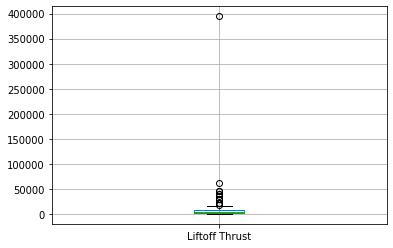

In [14]:
df.iloc[:,:5].boxplot()

<AxesSubplot:>

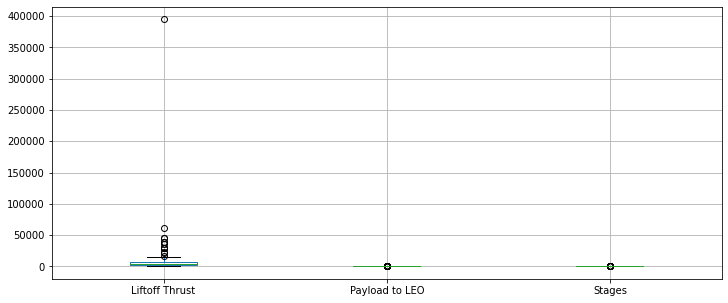

In [15]:
df.iloc[:,4:7].boxplot(figsize = (12,5))

<AxesSubplot:>

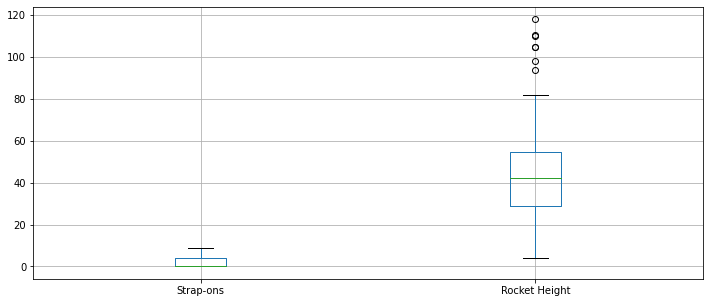

In [16]:
df.iloc[:,7:9].boxplot(figsize = (12,5))

<AxesSubplot:>

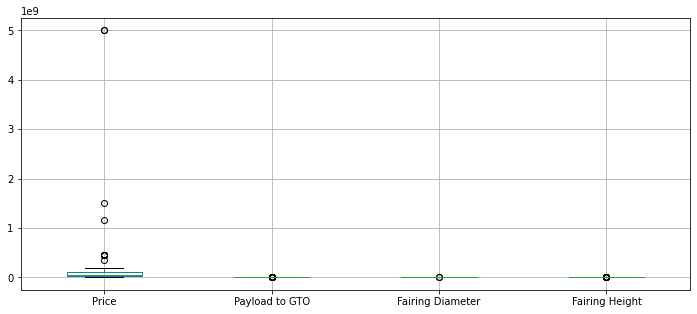

In [17]:
df.iloc[:,9:].boxplot(figsize = (12,5))

**Data has significant outliers**

### Handling Intermittent Findings 

In [18]:
#As number of stages can't be zero. Removing such rows
print(len(df[df['Stages']==0]))
#As there are just two such rows, removing the cols

2


**Number of stages cant be zero**

In [19]:
df = df[~(df['Stages']==0)]
df[df['Stages']==0]

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height


In [20]:
df['Lift_Thrust_ranges'] = pd.cut(x = df['Liftoff Thrust'],
                                   bins= [0,100,5000,10000,15000,20000,25000,30000,35000,40000,45000,
                                         50000,55000,100000],
                                   labels= ['0-100','>100-5000','>5000-10000','>10000-15000',
                                           '>15000-20000','>20000-25000','>25000-30000',
                                           '>30000-35000','>35000-40000','>40000-45000','>45000-50000',
                                           '>50000-55000','>55000'])

### Liftoff Thrust Analysis

In [21]:
lower_iqr = df[df['Liftoff Thrust']<df['Liftoff Thrust'].quantile(0.25)-(1.5*(df['Liftoff Thrust'].quantile(0.75)-df['Liftoff Thrust'].quantile(0.25)))]
lower_iqr

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height,Lift_Thrust_ranges


<AxesSubplot:xlabel='Status'>

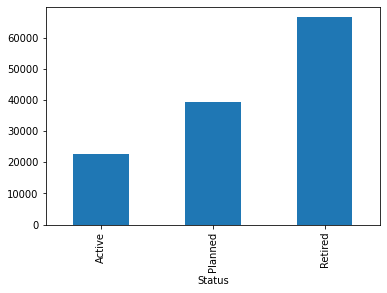

In [22]:
upper_iqr = df[df['Liftoff Thrust']>df['Liftoff Thrust'].quantile(0.75)+(1.5*(df['Liftoff Thrust'].quantile(0.75)-df['Liftoff Thrust'].quantile(0.25)))]
upper_iqr.groupby(['Status'])['Liftoff Thrust'].mean().plot(kind = 'bar')

**Retired Rockets have greater Liftoff thrust**

<AxesSubplot:xlabel='Status'>

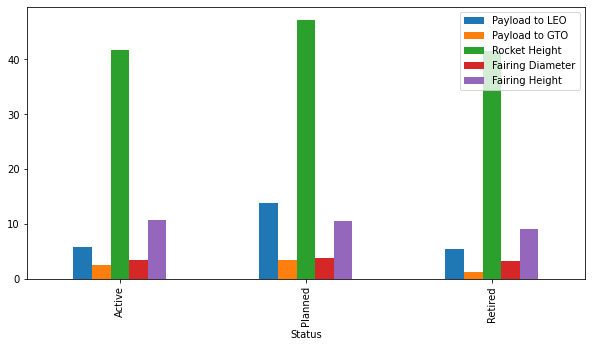

In [23]:
df.groupby(['Status'])['Payload to LEO','Payload to GTO','Rocket Height','Fairing Diameter','Fairing Height'].mean().plot(kind = 'bar',figsize = (10,5))

<AxesSubplot:xlabel='Status'>

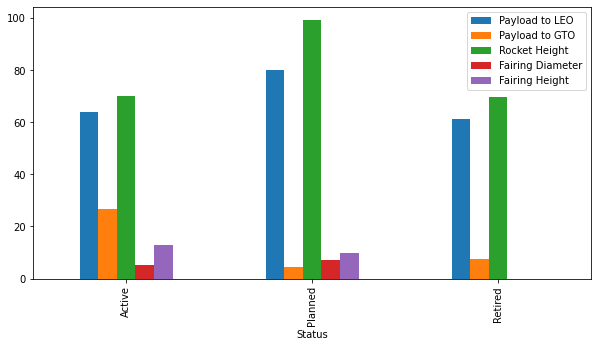

In [24]:
upper_iqr.groupby(['Status'])['Payload to LEO','Payload to GTO','Rocket Height','Fairing Diameter','Fairing Height'].mean().plot(kind = 'bar',figsize = (10,5))

**Despite having almost similar payload to carry and in some cases even less payload, almost similar rocket height, almost similar fairing diameter, almost similar fairing height, the liftoff thrust in case of retired rockets was found pretty high**

**Is it related to company??**

<AxesSubplot:xlabel='Cmp'>

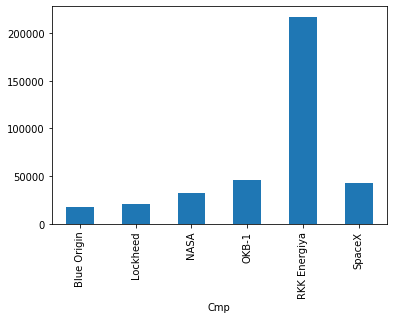

In [25]:
upper_iqr.groupby(['Cmp'])['Liftoff Thrust'].mean().plot(kind = 'bar')

In [26]:
upper_iqr[upper_iqr['Cmp']=='RKK Energiya']

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height,Lift_Thrust_ranges
158,Energiya/Buran,RKK Energiya,https://en.wikipedia.org/wiki/Energia#Development,Retired,394723.0,100.05,1.0,4.0,59.0,5.000000e+09,30.0,NaN,NaN,NaN
159,Energiya/Polyus,RKK Energiya,https://en.wikipedia.org/wiki/Energia#Development,Retired,39473.0,100.05,1.0,4.0,59.0,5.000000e+09,30.0,NaN,NaN,>35000-40000


In [27]:
#Going through the wiki page we found that the Liftoff Thrust for Energiya/ Buran is 29000 KN at Sea Level and 32000 KN at Vacuum
df.at[158,'Liftoff Thrust']=32000 #For Buran:taken from wikipedia
#From http://www.boris-lux.de/04_types/61_lv/sp_ru/16_ene/enpol.php
df.at[159,'Liftoff Thrust'] = 35129.90


In [28]:
df.describe()

,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height
count,297.000000,414.000000,410.000000,394.000000,332.000000,1.060000e+02,414.000000,231.000000,167.000000
mean,6082.363300,6.363483,2.770732,1.794416,42.190512,2.014875e+08,1.723401,3.325931,9.838802
std,7885.864164,16.294968,0.839794,2.543438,17.719231,6.979833e+08,4.228036,1.446057,5.421305
min,56.000000,0.000000,1.000000,0.000000,4.000000,4.400000e+05,0.000000,0.500000,0.800000
25%,1607.000000,0.000000,2.000000,0.000000,28.925000,3.080000e+07,0.000000,2.400000,7.700000
50%,3780.000000,0.500000,3.000000,0.000000,42.000000,5.250000e+07,0.000000,3.350000,8.900000
75%,7661.000000,6.735000,3.000000,4.000000,54.605000,1.082500e+08,2.200000,4.200000,12.000000
max,61800.000000,140.000000,5.000000,9.000000,118.000000,5.000000e+09,50.000000,9.000000,26.500000


**Standard Deviation is very high in Liftoff Thrust**

In [29]:
upper_iqr = df[df['Liftoff Thrust']>df['Liftoff Thrust'].quantile(0.75)+(1.5*(df['Liftoff Thrust'].quantile(0.75)-df['Liftoff Thrust'].quantile(0.25)))]

Text(0.5, 1.0, 'Difference in Mean and Median')

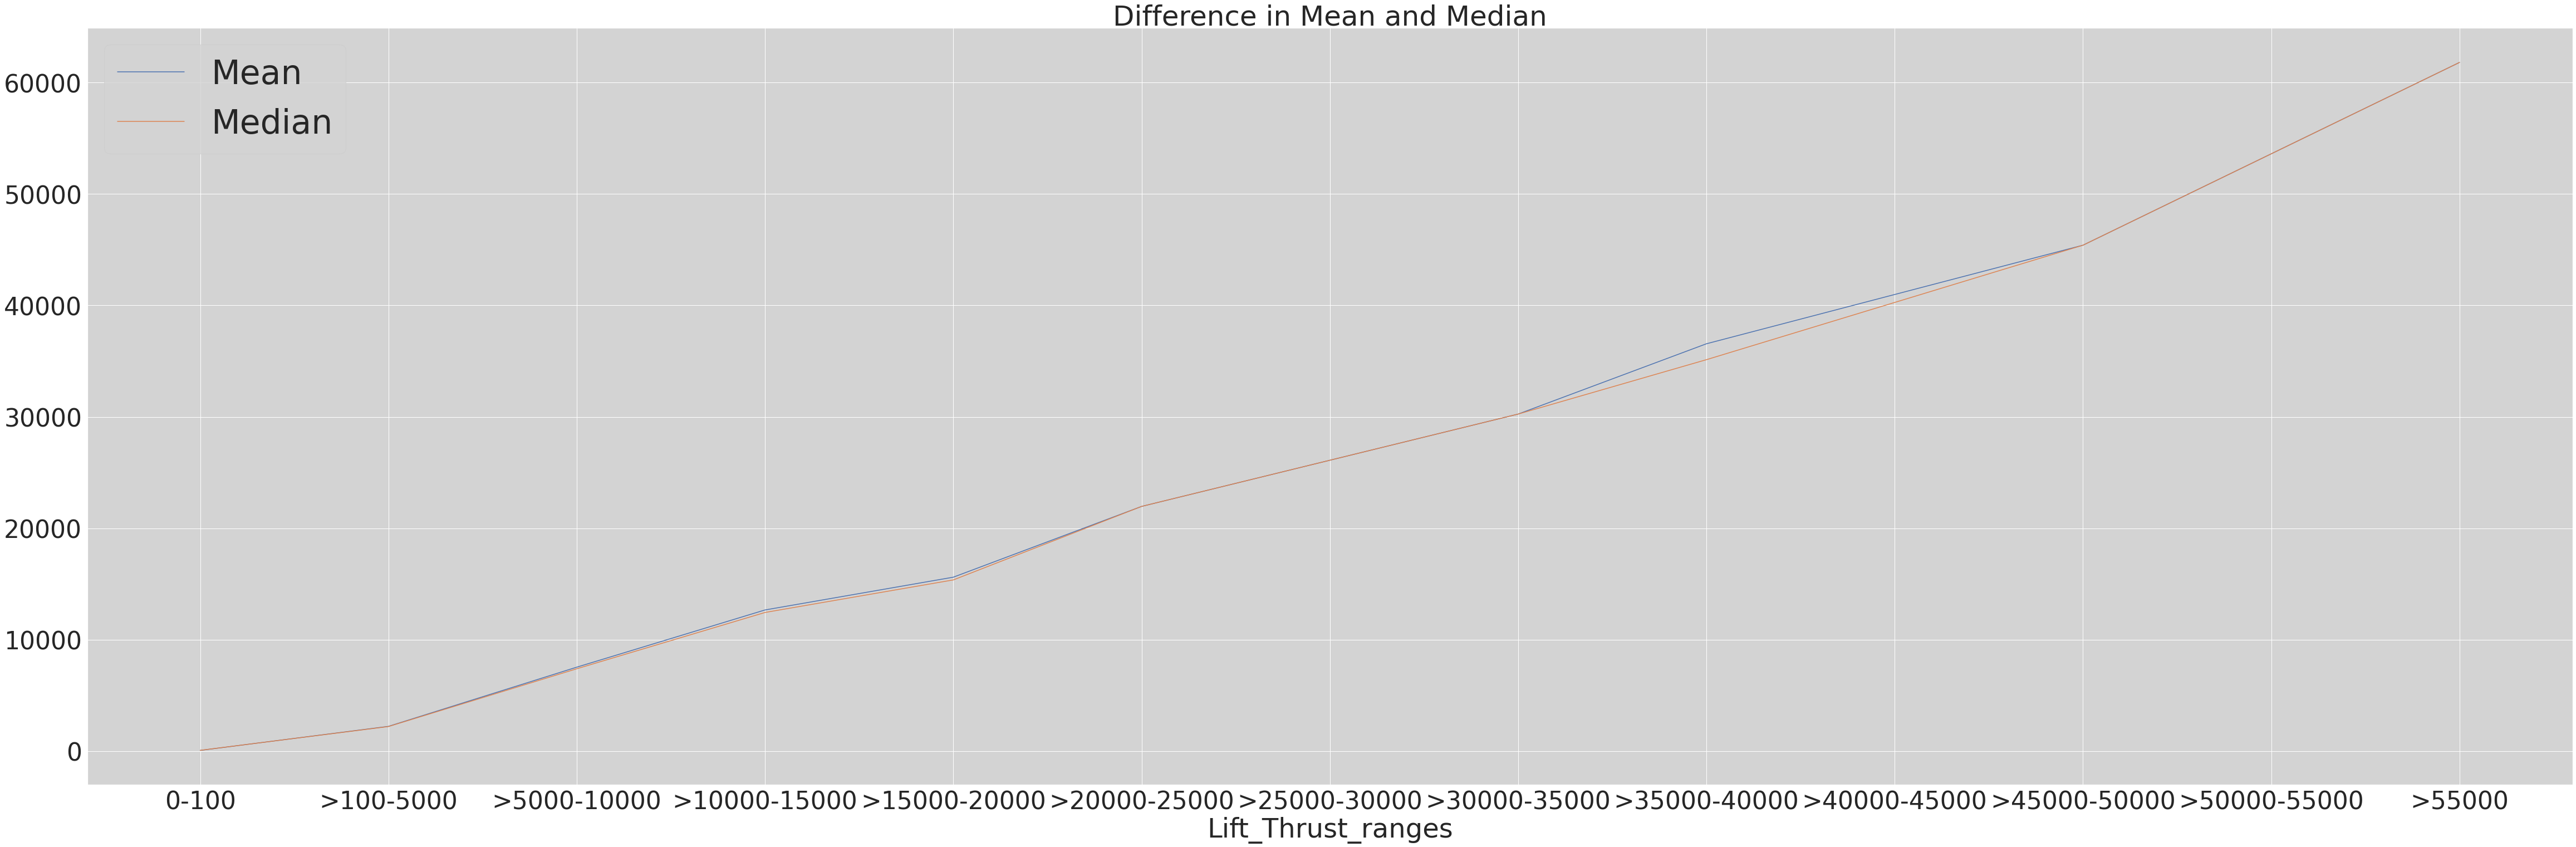

In [30]:
plt.figure(figsize = (80,25))
mean_range = df.groupby(['Lift_Thrust_ranges'])['Liftoff Thrust'].mean()
mean_range.dropna(inplace=True)
sns.set_style("darkgrid")
sns.set(font_scale = 4,rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgreen'})
sns.lineplot(x = mean_range.index, y = mean_range.values,markers = True)
median_range = df.groupby(['Lift_Thrust_ranges'])['Liftoff Thrust'].median()
median_range.dropna(inplace=True)
sns.lineplot(x = median_range.index, y = median_range.values,markers=True)
plt.legend(['Mean','Median'],fontsize = 60)
plt.title('Difference in Mean and Median',fontsize = 50)
# plt.vlines(x=median_range.index, ymin=-200, ymax=100000, color='r', label='test lines')

**If mean is greater than median, data is positively skewed else the data is negatively skewed**

Text(0.5, 1.0, 'Difference B/w Mean and Median In Different Thrust Level Categories')

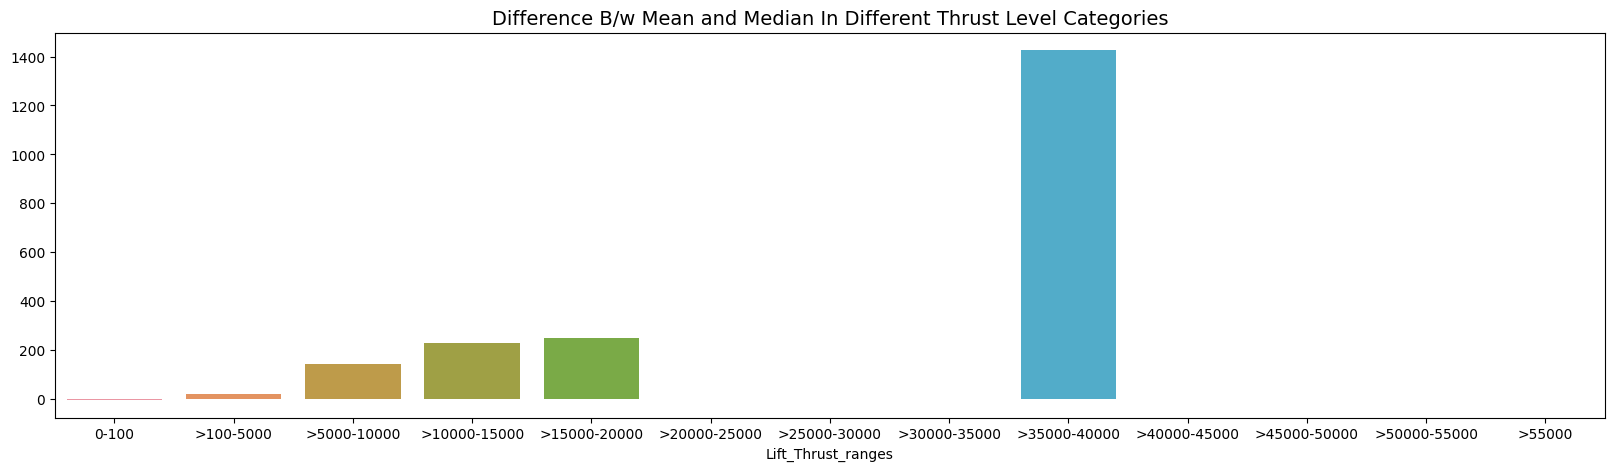

In [31]:
sns.reset_defaults()
diff_mean_median = mean_range-median_range
plt.figure(figsize = (20,5))
sns.barplot(x = diff_mean_median.index, y = diff_mean_median.values)
plt.title('Difference B/w Mean and Median In Different Thrust Level Categories',fontsize = 14)

In [32]:
std_dict = dict()
for i in diff_mean_median[diff_mean_median>10].index.values:
    std_dict[i] = df[df['Lift_Thrust_ranges']==i]['Liftoff Thrust'].std()

Text(0, 0.5, 'Standard Deviation')

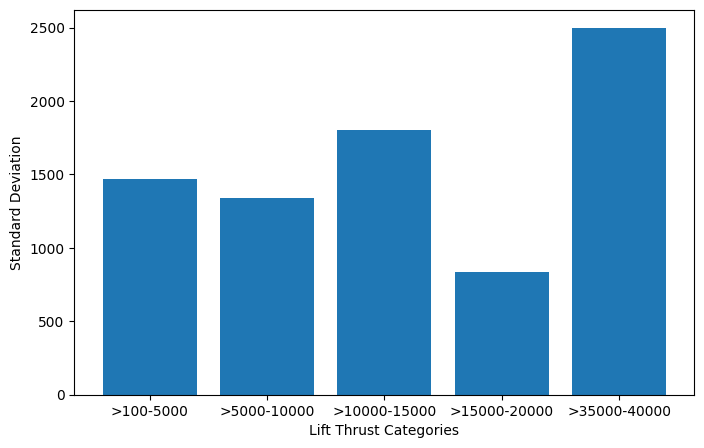

In [33]:
plt.figure(figsize = (8,5))
plt.bar(x = std_dict.keys(),height= std_dict.values())
plt.xlabel('Lift Thrust Categories')
plt.ylabel('Standard Deviation')

In [34]:
upper_iqr = df[df['Liftoff Thrust']>df['Liftoff Thrust'].quantile(0.75)+(1.5*(df['Liftoff Thrust'].quantile(0.75)-df['Liftoff Thrust'].quantile(0.25)))]

<AxesSubplot:xlabel='Cmp'>

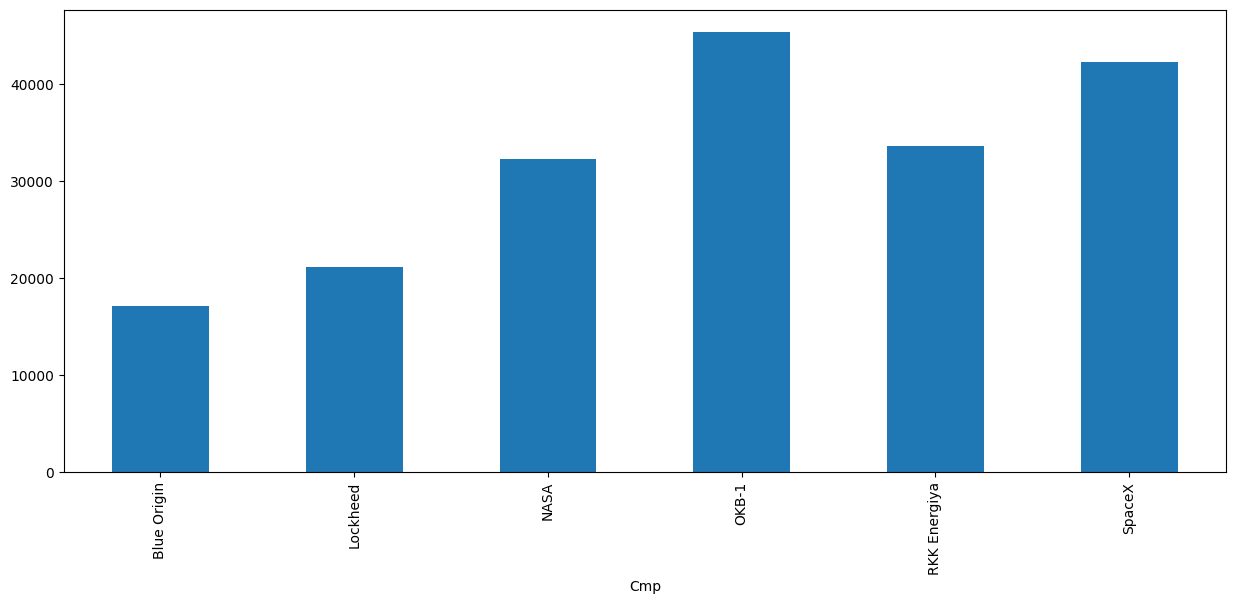

In [35]:
plt.figure(figsize = (15,6))
upper_iqr.groupby(['Cmp'])['Liftoff Thrust'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Status'>

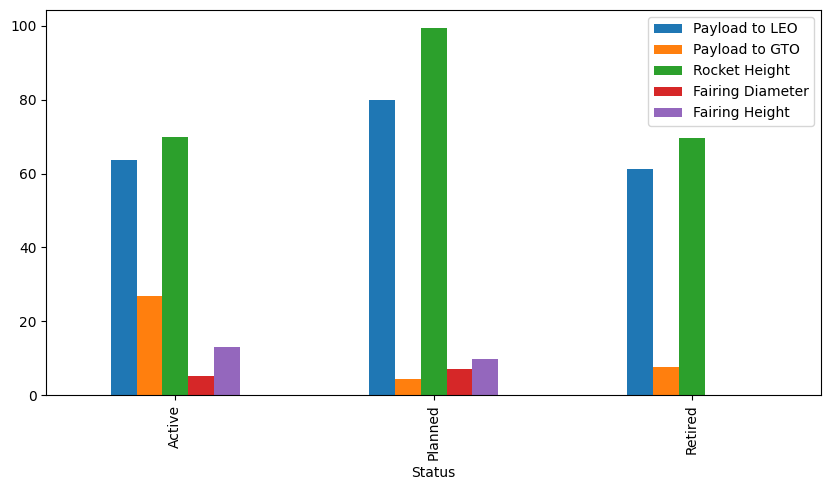

In [36]:
upper_iqr.groupby(['Status'])['Payload to LEO','Payload to GTO','Rocket Height','Fairing Diameter','Fairing Height'].mean().plot(kind = 'bar',figsize = (10,5))

<AxesSubplot:xlabel='Status'>

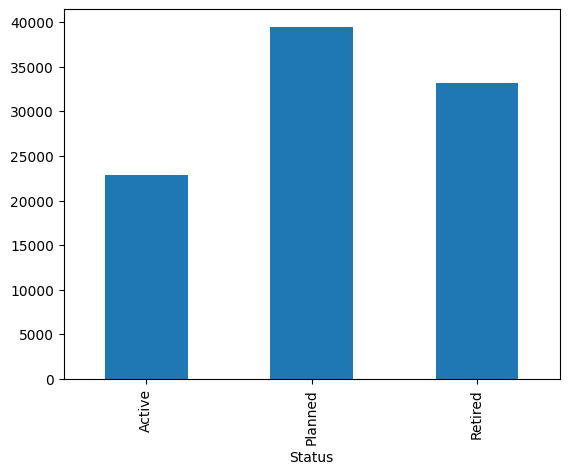

In [37]:
upper_iqr.groupby(['Status'])['Liftoff Thrust'].mean().plot(kind = 'bar')

<AxesSubplot:>

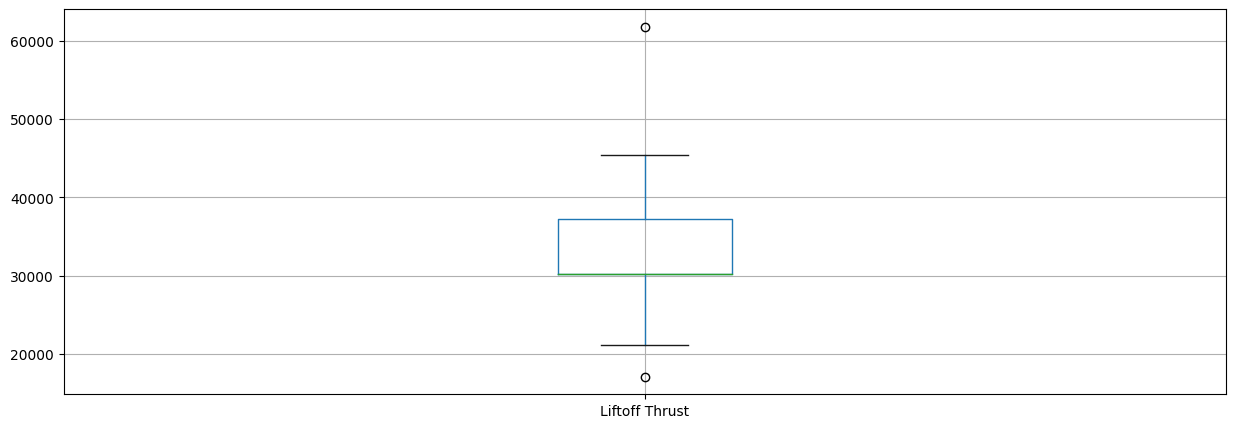

In [38]:
upper_iqr.iloc[:,0:5].boxplot(figsize = (15,5))

Text(0.5, 1.0, 'Thrust Comparison')

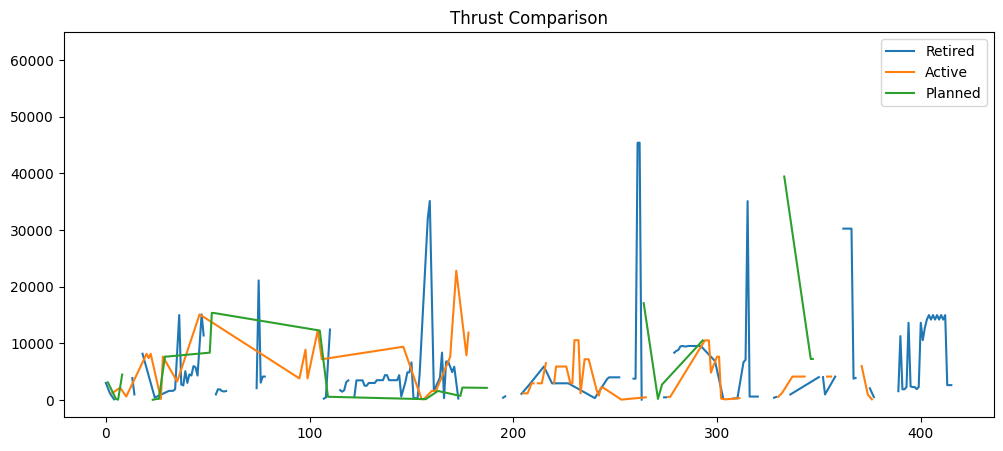

In [39]:
plt.figure(figsize = (12,5))
plt.plot(df[df['Status']=='Retired']['Liftoff Thrust'])
plt.plot(df[df['Status']=='Active']['Liftoff Thrust'])
plt.plot(df[df['Status']=='Planned']['Liftoff Thrust'])
plt.legend(['Retired','Active','Planned'])
plt.title('Thrust Comparison')

**Some retired rockets from the past had insane liftoff thrust**

In [40]:
print('Max Liftoff Thrust: ',df['Liftoff Thrust'].max())
print('Min Liftoff Thrust: ',df['Liftoff Thrust'].min())

Max Liftoff Thrust:  61800.0
Min Liftoff Thrust:  56.0


In [41]:
df[df['Liftoff Thrust']>55000]

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height,Lift_Thrust_ranges
372,Starship-Super Heavy,SpaceX,https://en.wikipedia.org/wiki/BFR_(rocket),Planned,61800.0,100.0,2.0,0.0,118.0,NaN,0.0,9.0,NaN,>55000


**Going through the website, the data is found to be correct**

In [42]:
df[df['Liftoff Thrust']<60]

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height,Lift_Thrust_ranges
23,Zéphyr,Venture OS,https://fr.wikipedia.org/wiki/Z%C3%A9phyr_(fus...,Planned,56.0,0.08,2.0,0.0,12.3,NaN,0.0,1.0,NaN,0-100


Text(0.5, 1.0, 'Thrust Distribution')

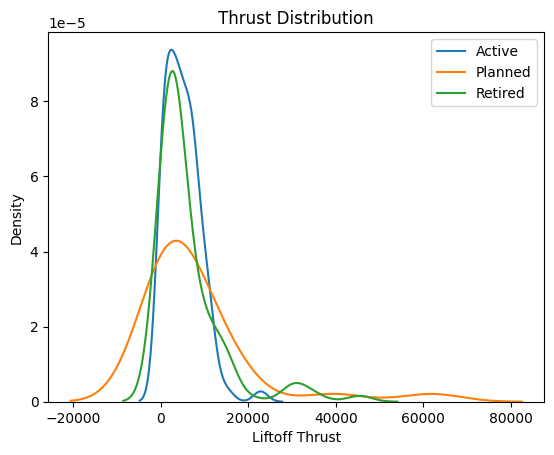

In [43]:
sns.kdeplot(df[df['Status']=='Active']['Liftoff Thrust'])
sns.kdeplot(df[df['Status']=='Planned']['Liftoff Thrust'])
sns.kdeplot(df[df['Status']=='Retired']['Liftoff Thrust'])
plt.legend(['Active','Planned','Retired'])
plt.title('Thrust Distribution')

**Companies are trying to bring down liftoff thrust in most of the planned rockets and are also planning to make rockets with insane lift thrust**

**The longer tail of the retired and planned rockets suggest, companies used to and are still planning to make rockets with massive liftoff thrust**

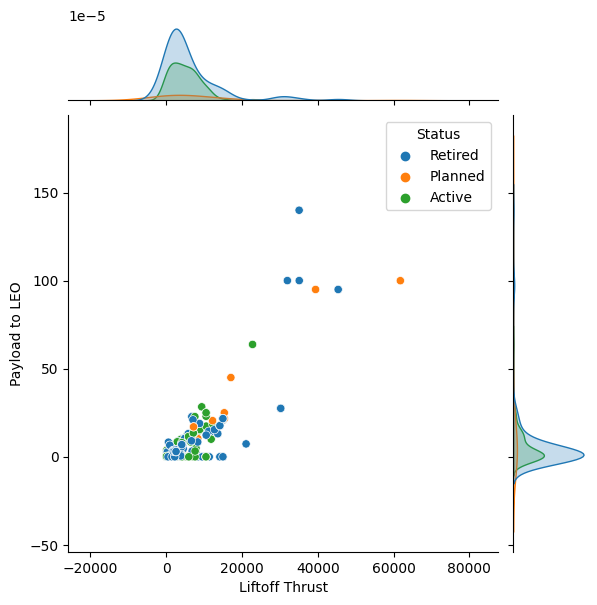

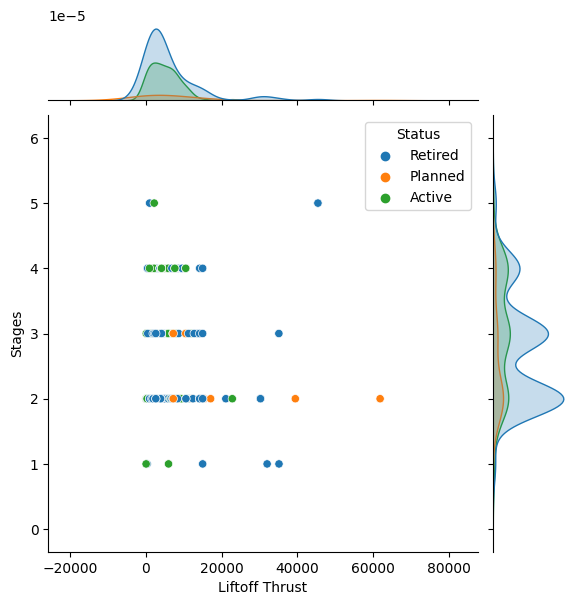

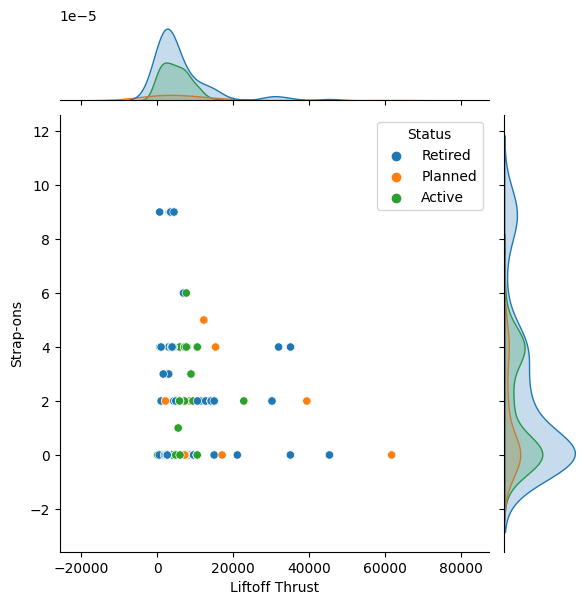

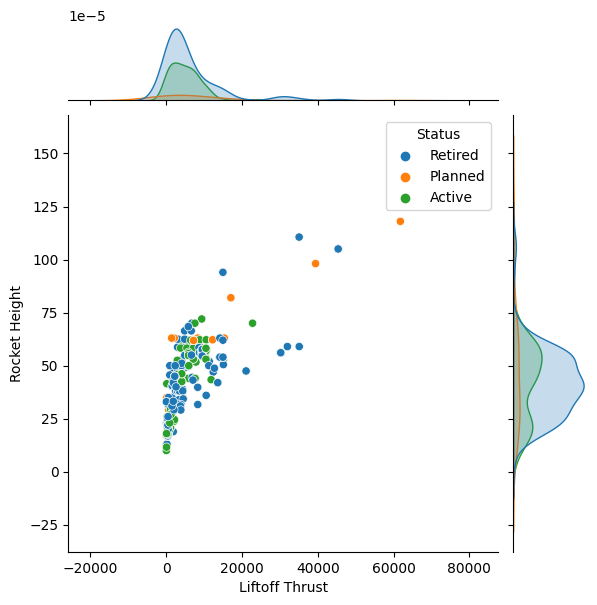

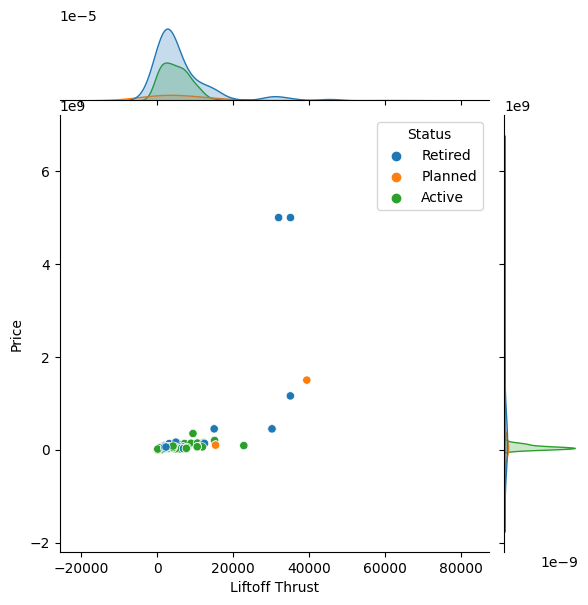

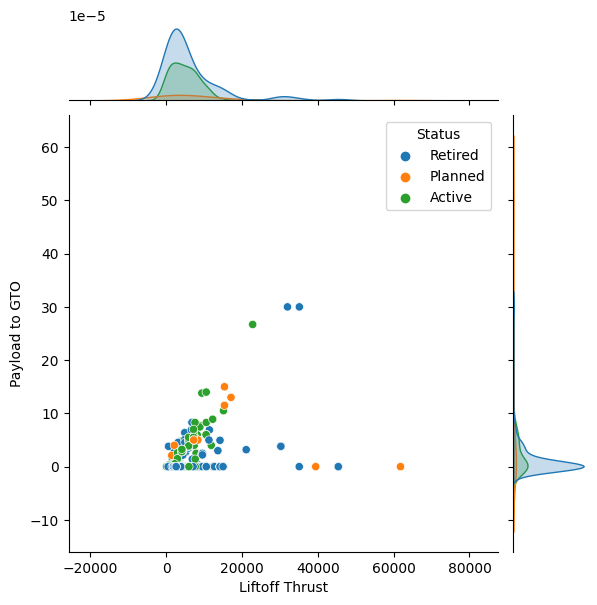

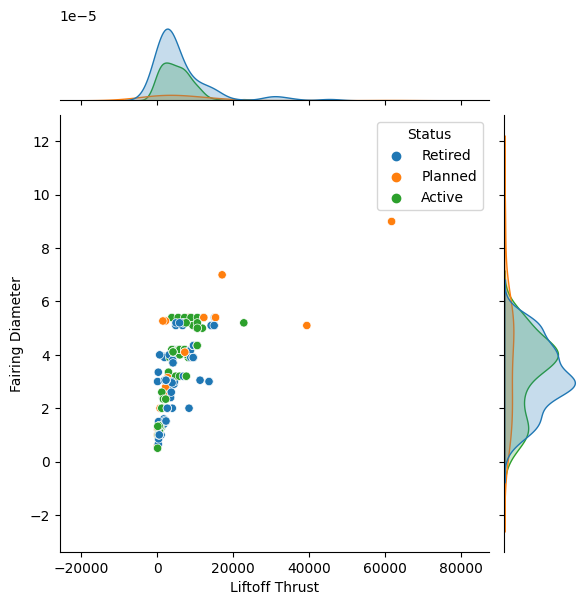

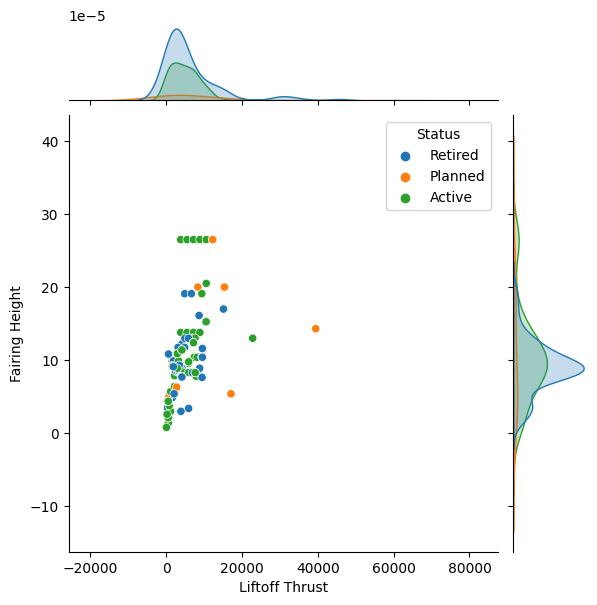

In [44]:
for i in df.select_dtypes(include='number').columns:
    if i!='Liftoff Thrust':
        sns.jointplot(df['Liftoff Thrust'],df[i],hue=df['Status'])
    else:
        continue

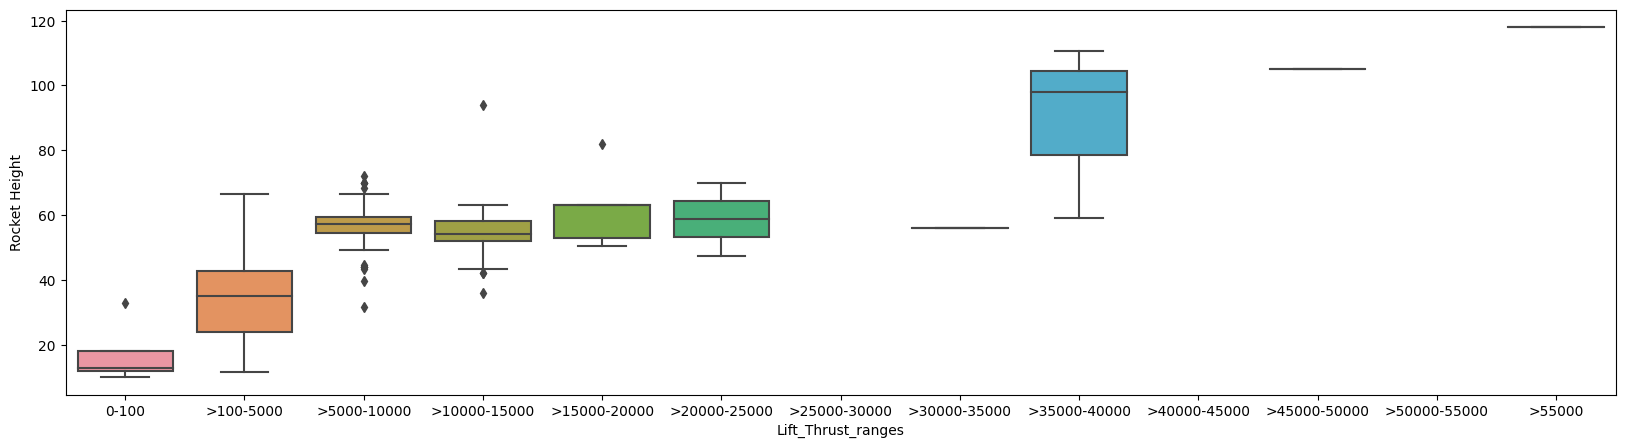

In [45]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df['Lift_Thrust_ranges'], y = df['Rocket Height'])
plt.show()

**Increase in Rocket Height means higher lift off force required**

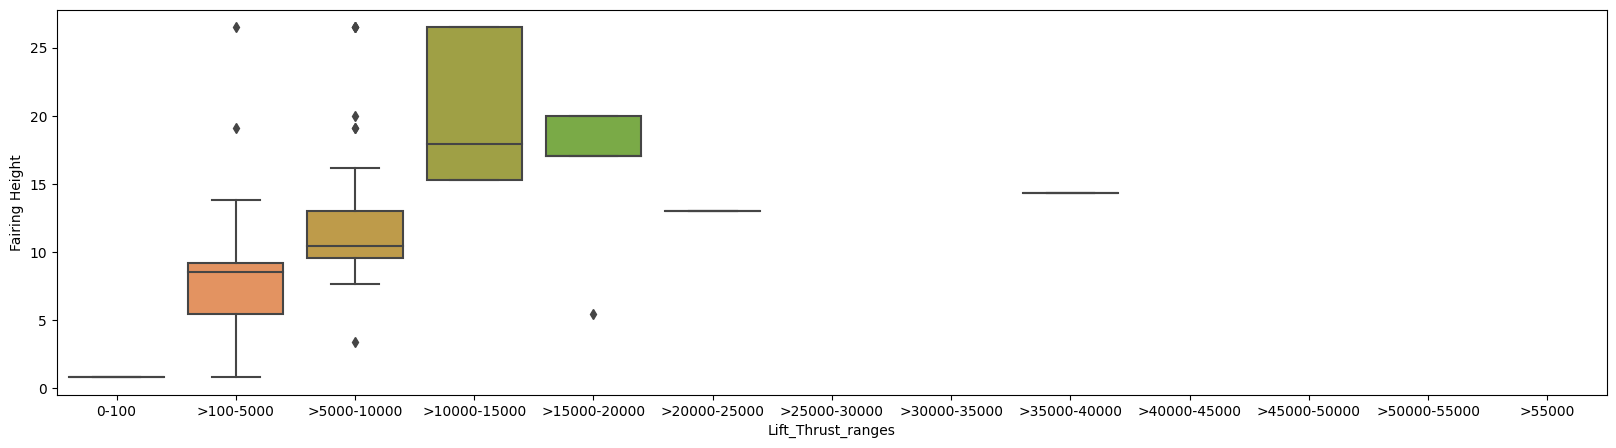

In [46]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df['Lift_Thrust_ranges'], y = df['Fairing Height'])
plt.show()

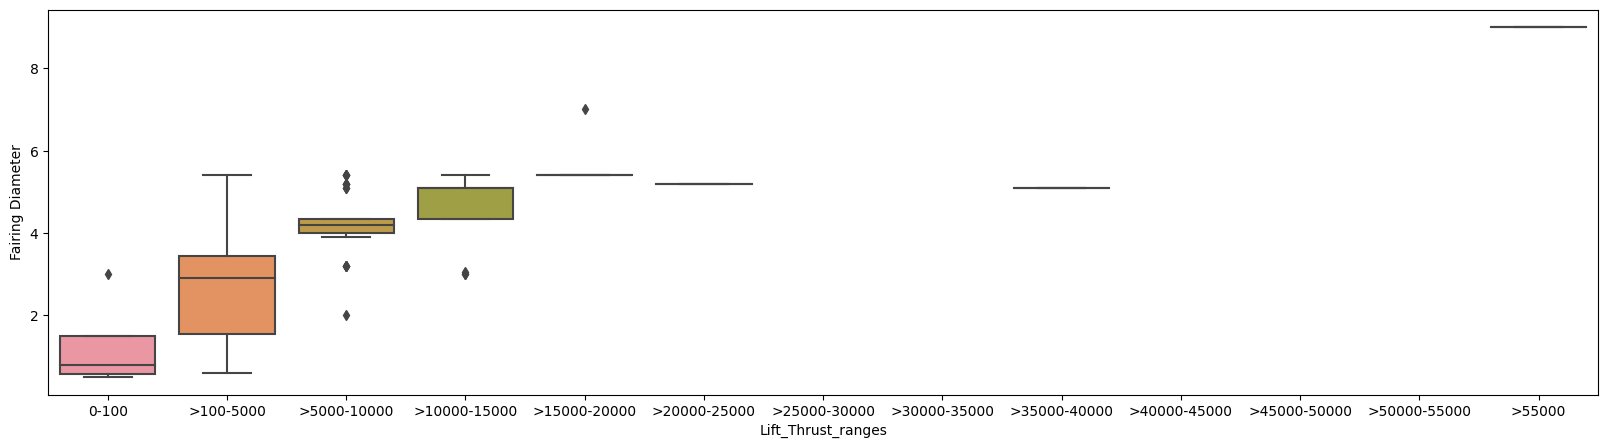

In [47]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df['Lift_Thrust_ranges'], y = df['Fairing Diameter'])
plt.show()

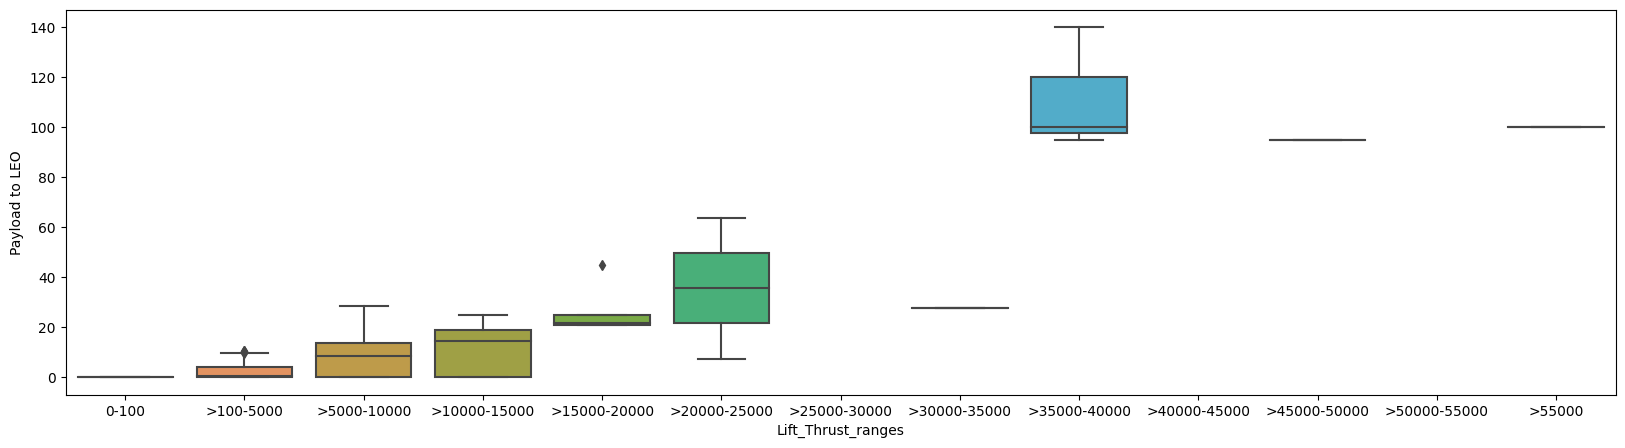

In [48]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df['Lift_Thrust_ranges'], y = df['Payload to LEO'])
plt.show()

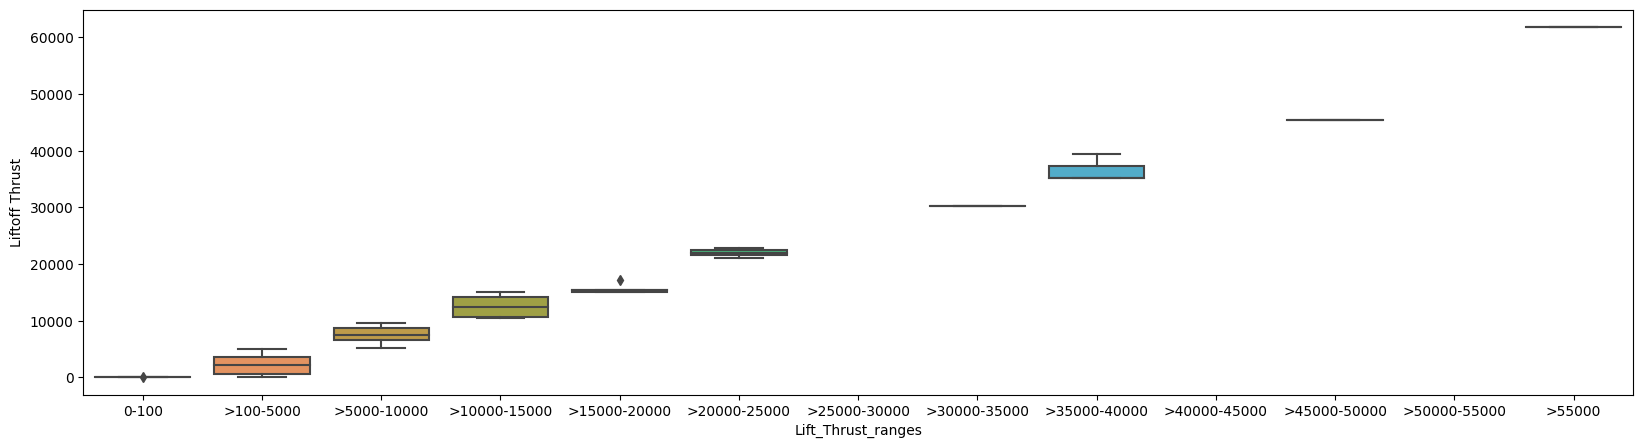

In [49]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df['Lift_Thrust_ranges'], y = df['Liftoff Thrust'])
plt.show()

### Rocket Height Analysis

In [50]:
print('The maximum rocket height is: ',df['Rocket Height'].max())
print('The minimum rocket height is: ',df['Rocket Height'].min())

The maximum rocket height is:  118.0
The minimum rocket height is:  4.0


In [51]:
df[df['Rocket Height']>100]
#Going through the website, it confirms that the data is legit

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height,Lift_Thrust_ranges
239,Long March 9,CASC,https://en.wikipedia.org/wiki/Long_March_(rock...,Planned,NaN,140.0,3.0,4.0,110.0,NaN,50.0,NaN,NaN,NaN
261,N1-L3,OKB-1,https://en.wikipedia.org/wiki/N1_(rocket),Retired,45400.0,95.0,5.0,0.0,105.0,NaN,0.0,NaN,NaN,>45000-50000
262,N1-L3 M,OKB-1,https://en.wikipedia.org/wiki/N1_(rocket),Retired,45400.0,95.0,5.0,0.0,105.0,NaN,0.0,NaN,NaN,>45000-50000
315,Saturn V,NASA,https://en.wikipedia.org/wiki/Saturn_V,Retired,35100.0,140.0,3.0,0.0,110.6,1.160000e+09,0.0,NaN,NaN,>35000-40000
372,Starship-Super Heavy,SpaceX,https://en.wikipedia.org/wiki/BFR_(rocket),Planned,61800.0,100.0,2.0,0.0,118.0,NaN,0.0,9.0,NaN,>55000


In [52]:
df[df['Rocket Height']<5]

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height,Lift_Thrust_ranges
270,NOTS-EV-1 Pilot II,US Navy,https://en.wikipedia.org/wiki/NOTS-EV-1_Pilot,Retired,NaN,0.001,5.0,0.0,4.0,NaN,0.0,NaN,NaN,NaN


**The Pilot II was first carried by Doughlas and air launched from the drop zone**

**For this rocket the liftoff thrust is from the drop zone: https://military-history.fandom.com/wiki/NOTS-EV-1_Pilot**

In [53]:
df.at[270,'Liftoff Thrust'] = 63.2

In [54]:
lower_iqr = df[df['Rocket Height']<df['Rocket Height'].quantile(0.25)-(1.5*(df['Rocket Height'].quantile(0.75)-df['Rocket Height'].quantile(0.25)))]
lower_iqr

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height,Lift_Thrust_ranges


<AxesSubplot:xlabel='Status'>

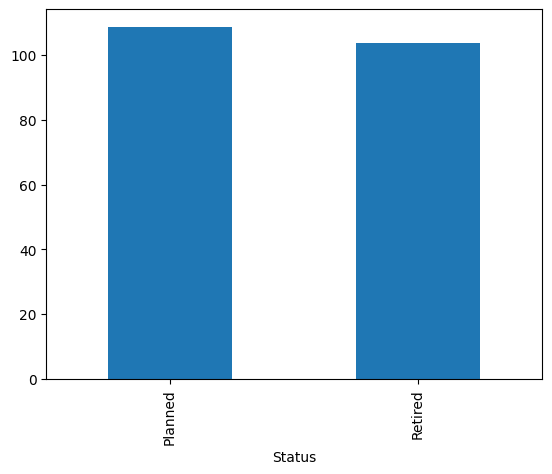

In [55]:
upper_iqr = df[df['Rocket Height']>df['Rocket Height'].quantile(0.75)+(1.5*(df['Rocket Height'].quantile(0.75)-df['Rocket Height'].quantile(0.25)))]
upper_iqr.groupby(['Status'])['Rocket Height'].mean().plot(kind = 'bar')

**Insanely Big Rockets were made in past days and they have planned to make some in future as well**

Text(0.5, 1.0, 'Height Variation')

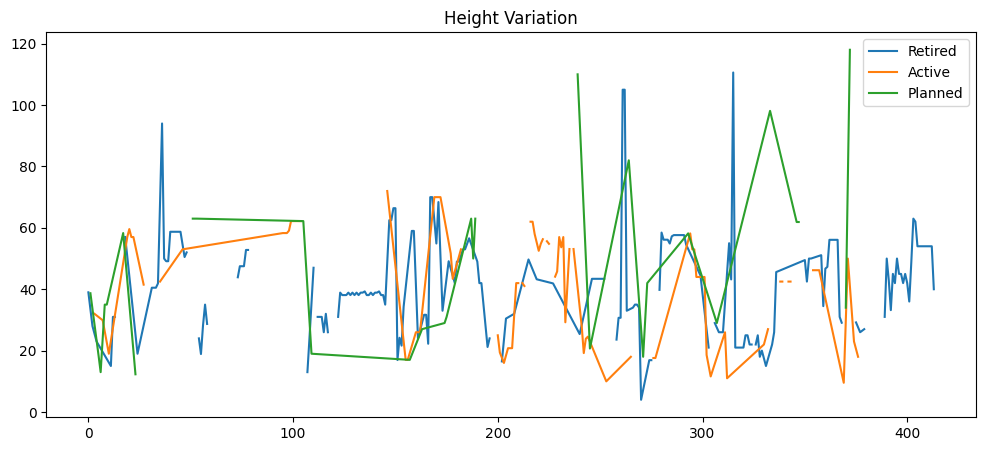

In [56]:
plt.figure(figsize = (12,5))
plt.plot(df[df['Status']=='Retired']['Rocket Height'])
plt.plot(df[df['Status']=='Active']['Rocket Height'])
plt.plot(df[df['Status']=='Planned']['Rocket Height'])
plt.legend(['Retired','Active','Planned'])
plt.title('Height Variation')

Text(0.5, 1.0, 'Height Distribution')

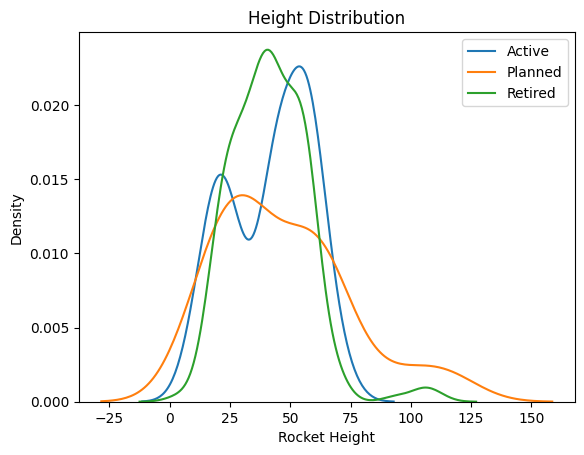

In [57]:
sns.kdeplot(df[df['Status']=='Active']['Rocket Height'])
sns.kdeplot(df[df['Status']=='Planned']['Rocket Height'])
sns.kdeplot(df[df['Status']=='Retired']['Rocket Height'])
plt.legend(['Active','Planned','Retired'])
plt.title('Height Distribution')

**The lineplot describes the reason behind the insanely large amount of thrust for some of the retired rockets**

**Companies are planning to bring down the height of rockets in future**

**Retired Rockets have bigger height than active rockets**

<AxesSubplot:title={'center':'Rocket Full Height Comparison'}, xlabel='Cmp'>

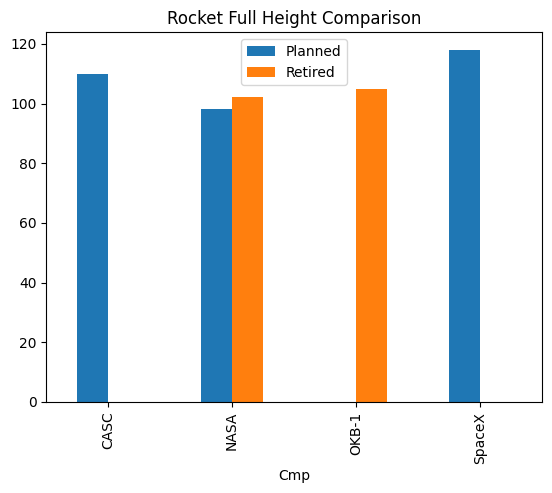

In [58]:
cmp_st_rh = upper_iqr.groupby(['Cmp','Status'])['Rocket Height'].mean().unstack()
cmp_st_rh.columns.name = None
cmp_st_rh.plot(kind = 'bar',title = 'Rocket Full Height Comparison')

### Fairing Height Analysis 

In [59]:
print('The maximum fairing height is: ',df['Fairing Height'].max())
print('The minimum fairing height is: ',df['Fairing Height'].min())

The maximum fairing height is:  26.5
The minimum fairing height is:  0.8


In [60]:
df[df['Fairing Height']>20]

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height,Lift_Thrust_ranges
99,Atlas V 501,ULA,https://en.wikipedia.org/wiki/Atlas_V,Active,3826.0,8.21,2.0,0.0,62.20,120000000.0,3.78,5.4,26.5,>100-5000
100,Atlas V 511,ULA,https://en.wikipedia.org/wiki/Atlas_V,Active,5515.0,11.00,2.0,1.0,62.20,130000000.0,5.25,5.4,26.5,>5000-10000
101,Atlas V 521,ULA,https://en.wikipedia.org/wiki/Atlas_V,Active,7204.0,13.50,2.0,2.0,62.20,135000000.0,6.48,5.4,26.5,>5000-10000
102,Atlas V 531,ULA,https://en.wikipedia.org/wiki/Atlas_V,Active,8892.0,15.53,2.0,3.0,62.20,140000000.0,7.45,5.4,26.5,>5000-10000
103,Atlas V 541,ULA,https://en.wikipedia.org/wiki/Atlas_V,Active,10581.0,17.41,2.0,4.0,62.20,145000000.0,8.29,5.4,26.5,>10000-15000
104,Atlas V 551,ULA,https://en.wikipedia.org/wiki/Atlas_V,Active,12269.0,18.85,2.0,5.0,62.20,153000000.0,8.90,5.4,26.5,>10000-15000
105,Atlas V 552,ULA,https://en.wikipedia.org/wiki/Atlas_V,Planned,12269.0,20.52,2.0,5.0,62.20,NaN,0.00,5.4,26.5,>10000-15000
231,Long March 5B,CASC,https://en.wikipedia.org/wiki/Long_March_5,Active,10565.0,23.00,2.0,4.0,53.66,NaN,0.00,5.2,20.5,>10000-15000


In [61]:
lower_iqr = df[df['Fairing Height']<df['Fairing Height'].quantile(0.25)-(1.5*(df['Fairing Height'].quantile(0.75)-df['Fairing Height'].quantile(0.25)))]
lower_iqr

,Name,Cmp,Wiki,Status,Liftoff Thrust,Payload to LEO,Stages,Strap-ons,Rocket Height,Price,Payload to GTO,Fairing Diameter,Fairing Height,Lift_Thrust_ranges
5,Vector-H,Vector,https://en.wikipedia.org/wiki/Vector-H,Planned,175.0,0.150,2.0,0.0,18.3,3000000.0,0.0,0.60,0.80,>100-5000
6,Vector-R,Vector,https://en.wikipedia.org/wiki/Vector-R,Planned,81.0,0.065,2.0,0.0,13.0,2000000.0,0.0,0.60,0.80,0-100
253,MOMO,IST,https://en.wikipedia.org/wiki/Interstellar_Tec...,Active,83.0,0.000,1.0,0.0,10.0,440000.0,0.0,0.50,0.80,0-100
312,SARGE,Exos,https://en.wikipedia.org/wiki/Exos_Aerospace#S...,Active,NaN,0.000,1.0,0.0,11.0,NaN,0.0,0.51,0.91,NaN


**Checking the relevance of the above data**

In [62]:
df.at[253,'Liftoff Thrust']=12#From the listed wiki website

<AxesSubplot:xlabel='Status'>

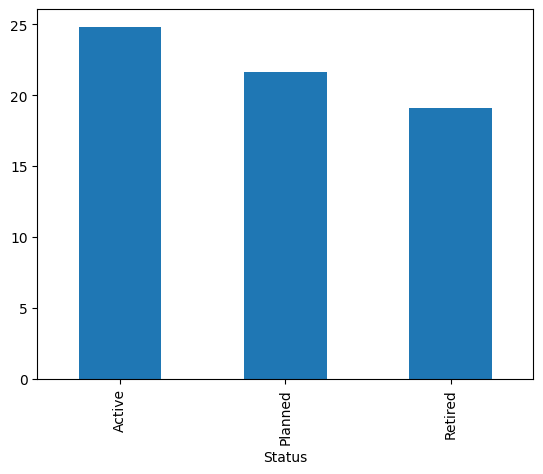

In [63]:
upper_iqr = df[df['Fairing Height']>df['Fairing Height'].quantile(0.75)+(1.5*(df['Fairing Height'].quantile(0.75)-df['Fairing Height'].quantile(0.25)))]
upper_iqr.groupby(['Status'])['Fairing Height'].mean().plot(kind = 'bar')

### Analysis Based on Straps 

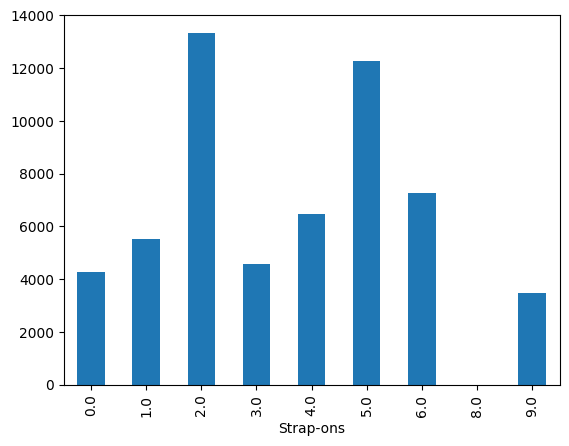

In [64]:
mean_st = df.groupby('Strap-ons')['Liftoff Thrust'].mean().plot(kind = 'bar')


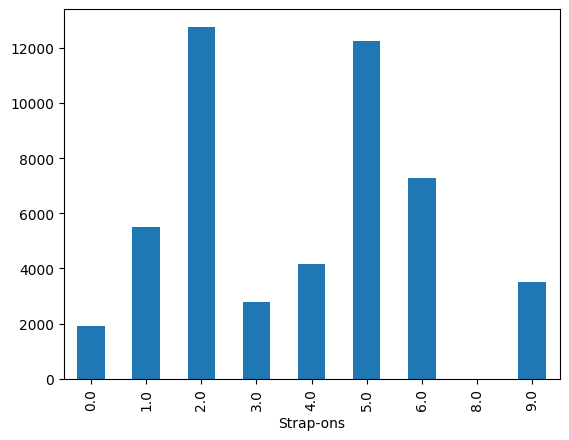

In [65]:
median_st = df.groupby('Strap-ons')['Liftoff Thrust'].median().plot(kind = 'bar')

**Strap-ons are the boosters mounted to provide additional thrust**

**For straps = 9, the thrust is pretty low. So, is the data correct??**

**The use of 9 straps is seen only in retired rockets and going through the website we found that each of the strap could provide very small amount of thrust. Thus, even though the number is pretty high, the amount of thrust that it could produce is pretty less**

### Any Relationship of nan in columns

<AxesSubplot:>

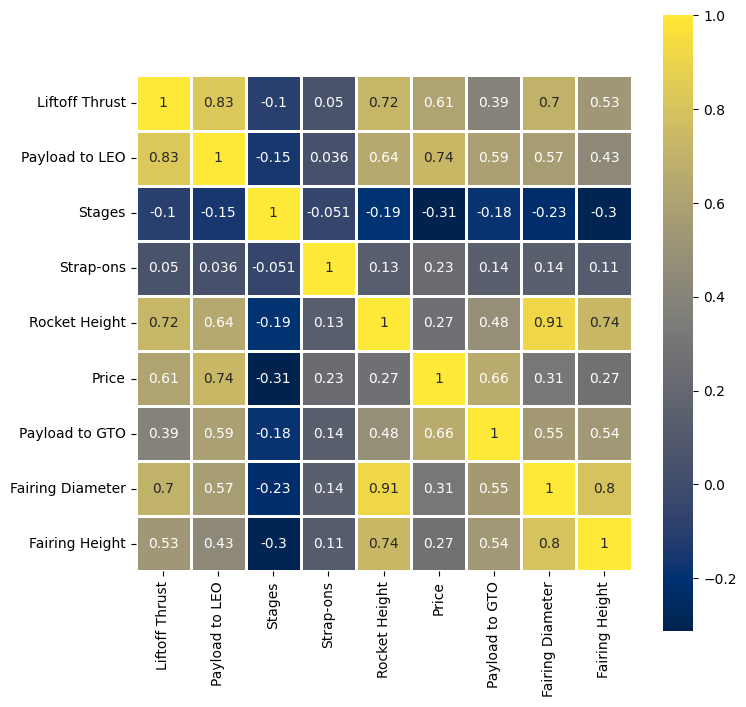

In [66]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True,linewidths=1,linecolor='white',square=True,cmap = 'cividis')

**we can assume that the null values in LiftOff Thrust is also more dependent on Fairing Diameter, Rocket Height and Payload to LEO**

**The rocket height is also mostly dependent of Fairing Diameter, Fairing Height and Liftoff Thrust**

<Figure size 10000x20000 with 0 Axes>

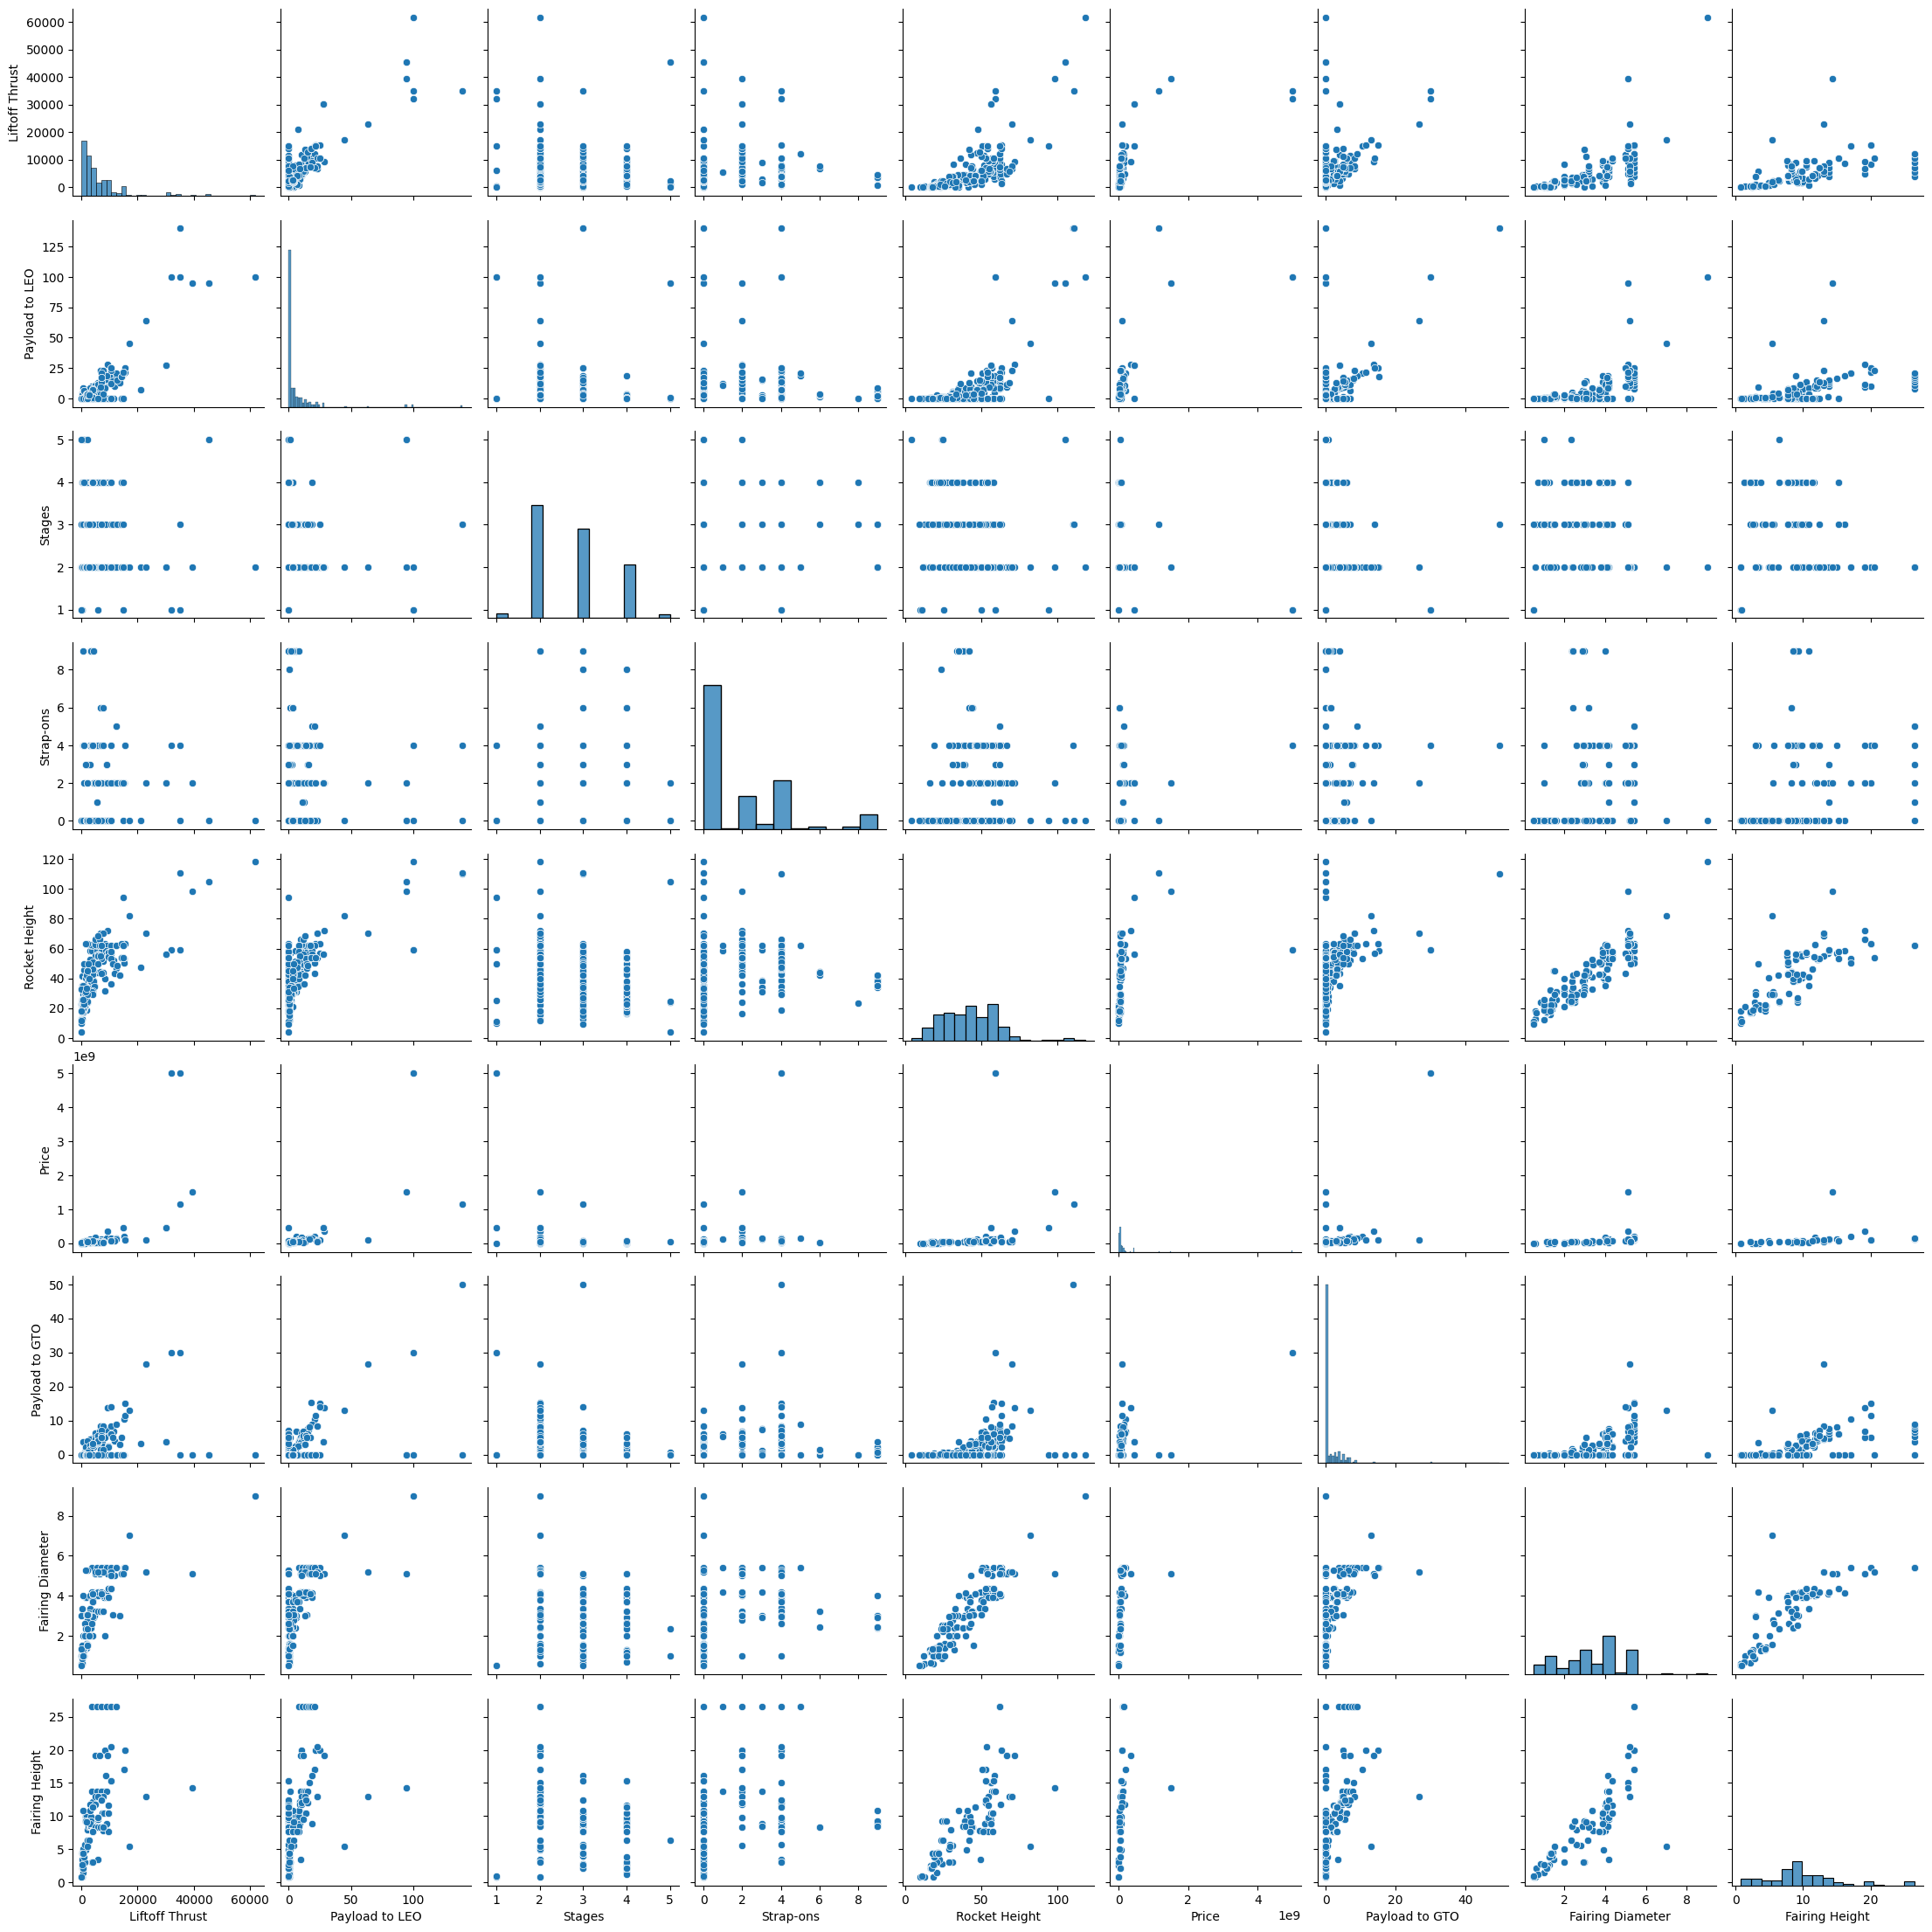

In [67]:
plt.figure(figsize = (100,200))
numeric = df.select_dtypes(include='float64')
sns.pairplot(numeric)
plt.show()

In [68]:
nullers = df[['Liftoff Thrust','Fairing Diameter','Fairing Height','Rocket Height']]
nullers.isnull().sum()

Liftoff Thrust      116
Fairing Diameter    183
Fairing Height      247
Rocket Height        82
dtype: int64

### Developing a model to predict fairing diameter based on rocket height to replace null values

In [69]:
fd_rh = df[['Fairing Diameter','Rocket Height']]
not_null = fd_rh[~fd_rh.isnull().any(axis = 1)]

<AxesSubplot:title={'center':'Problem of Outliers??'}>

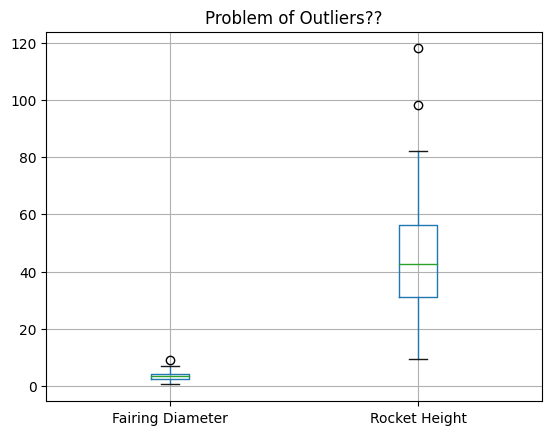

In [70]:
plt.title('Problem of Outliers??')
not_null.boxplot()

**We won't have significant issue due to outliers**

In [71]:
from sklearn.linear_model import (LinearRegression, ElasticNet, LassoCV, HuberRegressor, RANSACRegressor,
                                 TheilSenRegressor)
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train,X_test,y_train,y_test = train_test_split(not_null.iloc[:,1],not_null.iloc[:,0],test_size = 0.15,random_state=42)

In [72]:
def std_scaler(y_val):
    std_scl = StandardScaler()
    output = std_scl.fit_transform(y_val.values.reshape(-1,1))
    return output,std_scl

In [73]:
y_train,std_scaler = std_scaler(y_train)

In [74]:
y_test = std_scaler.transform(y_test.values.reshape(-1,1))

In [75]:
model = [LinearRegression(), ElasticNet(alpha= 0.5), LassoCV(eps = 0.005),HuberRegressor(),
        RANSACRegressor(),TheilSenRegressor()]
evaluate = dict()
for i in model:
    lr = i
    i.fit(np.array(X_train).reshape(-1,1),y_train)
    pred = i.predict(np.array(X_test).reshape(-1,1))
    error = mean_squared_error(y_test,pred)
    evaluate[i] = error
    


In [76]:
lr = min(evaluate,key=evaluate.get)
lr.fit(np.array(X_train).reshape(-1,1),y_train)

HuberRegressor()

In [77]:
pred = lr.predict(np.array(X_test).reshape(-1,1))

In [78]:
mean_squared_error(y_test,pred)

0.13776948294997396

In [79]:
mean_absolute_error(y_test,pred)

0.3064987397309783

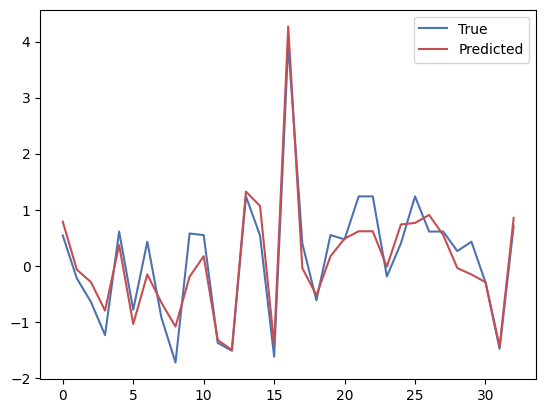

In [80]:
plt.plot(np.array(y_test),color = 'b')
plt.plot(np.array(pred),color = 'r')
plt.legend(['True','Predicted'])

In [81]:
fdnull_rhfill = fd_rh[fd_rh['Fairing Diameter'].isna()]
fdnull_rhfill = fdnull_rhfill[fdnull_rhfill['Rocket Height'].notnull()]
vals = lr.predict(np.array(fdnull_rhfill['Rocket Height']).reshape(-1,1))

In [82]:
vals = std_scaler.inverse_transform(vals.reshape(-1,1))

In [83]:
fdnull_rhfill['Fairing Diameter'] = vals

In [84]:
#Replacing Null Values in Fairing Diameter
df['Fairing Diameter'] = df['Fairing Diameter'].fillna(fdnull_rhfill['Fairing Diameter'])

In [85]:
df.isnull().sum()

Name                    0
Cmp                     0
Wiki                    9
Status                  0
Liftoff Thrust        116
Payload to LEO          0
Stages                  4
Strap-ons              20
Rocket Height          82
Price                 308
Payload to GTO          0
Fairing Diameter       65
Fairing Height        247
Lift_Thrust_ranges    118
dtype: int64

### **Handling Null values in Fairing Height Using Rocket Height, Fairing Diameter and Liftoff Thrust**

<AxesSubplot:>

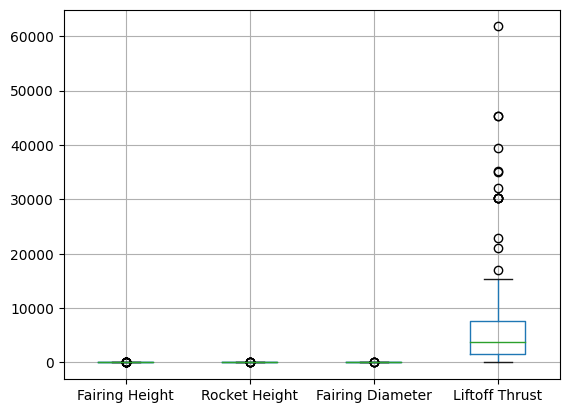

In [86]:
fh = df[['Fairing Height','Rocket Height','Fairing Diameter','Liftoff Thrust']]
fh.boxplot()

In [87]:
fh_nonull = fh[~fh.isnull().any(axis = 1)]
fh_nonull.shape

(146, 4)

<AxesSubplot:title={'center':'Problem of Outliers??'}>

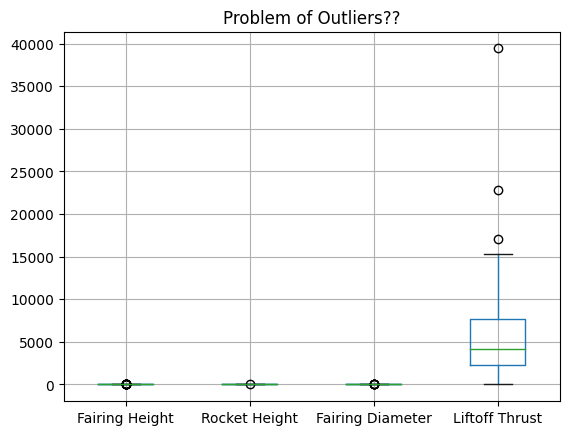

In [88]:
plt.title("Problem of Outliers??")
fh_nonull.boxplot()

In [89]:
lower_iqr = fh_nonull[fh_nonull['Fairing Height']<fh_nonull['Fairing Height'].quantile(0.25)-(1.5*(fh_nonull['Fairing Height'].quantile(0.75)-fh_nonull['Fairing Height'].quantile(0.25)))]
lower_iqr

,Fairing Height,Rocket Height,Fairing Diameter,Liftoff Thrust
5,0.8,18.3,0.6,175.0
6,0.8,13.0,0.6,81.0
253,0.8,10.0,0.5,12.0


In [90]:
#For Fairing Height, below IQR
print("The mean for Fairing Height for below allowable range: ",lower_iqr['Fairing Height'].mean())
print("The median for Fairing Height for below allowable range: ",lower_iqr['Fairing Height'].median())

#For Fairing Diameter, below IQR
print("The mean for Fairing Diameter for below allowable range: ",lower_iqr['Fairing Diameter'].mean())
print("The median for Fairing Diameter for below allowable range: ",lower_iqr['Fairing Diameter'].median())


#For Rocket Height, below IQR
print("The mean for Rocket Height for below allowable range: ",lower_iqr['Rocket Height'].mean())
print("The median for Rocket Height for below allowable range: ",lower_iqr['Rocket Height'].median())



The mean for Fairing Height for below allowable range:  0.8000000000000002
The median for Fairing Height for below allowable range:  0.8
The mean for Fairing Diameter for below allowable range:  0.5666666666666667
The median for Fairing Diameter for below allowable range:  0.6
The mean for Rocket Height for below allowable range:  13.766666666666666
The median for Rocket Height for below allowable range:  13.0


In [91]:
#For Fairing Height, above IQR
print("The mean for Fairing Height for above allowable range: ",upper_iqr['Fairing Height'].mean())
print("The median for Fairing Height for above allowable range: ",upper_iqr['Fairing Height'].median())

#For Fairing Diameter, above IQR
print("The mean for Fairing Diameter for above allowable range: ",upper_iqr['Fairing Diameter'].mean())
print("The median for Fairing Diameter for above allowable range: ",upper_iqr['Fairing Diameter'].median())


#For Rocket Height, above IQR
print("The mean for Rocket Height for above allowable range: ",upper_iqr['Rocket Height'].mean())
print("The median for Rocket Height for above allowable range: ",upper_iqr['Rocket Height'].median())



The mean for Fairing Height for above allowable range:  23.09285714285715
The median for Fairing Height for above allowable range:  23.5
The mean for Fairing Diameter for above allowable range:  5.321428571428571
The median for Fairing Diameter for above allowable range:  5.4
The mean for Rocket Height for above allowable range:  63.06142857142857
The median for Rocket Height for above allowable range:  62.2


In [92]:
print('The standard deviation of Fairing Height is: ',df['Fairing Height'].std())

The standard deviation of Fairing Height is:  5.42130533812207


<AxesSubplot:xlabel='Fairing Height', ylabel='Density'>

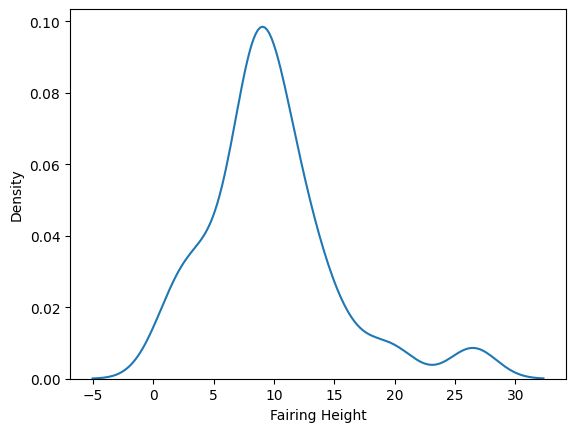

In [93]:
sns.kdeplot(df['Fairing Height'])

In [94]:
X = fh_nonull[['Rocket Height','Fairing Diameter','Liftoff Thrust']]
y = fh_nonull['Fairing Height']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [95]:
def std_scaler(y_val):
    std_scl = StandardScaler()
    output = std_scl.fit_transform(y_val.values.reshape(-1,1))
    return output,std_scl

In [96]:
y_train,std_scaler = std_scaler(y_train)
y_test = std_scaler.transform(y_test.values.reshape(-1,1))

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import (LinearRegression, ElasticNetCV, HuberRegressor, TheilSenRegressor,
                                 RANSACRegressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
evaluate = dict()
models = [DecisionTreeRegressor(), LinearRegression(),ElasticNetCV(), 
          RandomForestRegressor(), SVR(), XGBRegressor(),LGBMRegressor(),BayesianRidge(),
         HuberRegressor(),TheilSenRegressor(),RANSACRegressor()]
for i in models:
    i.fit(X = X_train,y = y_train)
    pred = i.predict(X_test)
    evaluate[i] = mean_squared_error(y_test,pred)
    

In [98]:
m = CatBoostRegressor(verbose=0)
m.fit(X_train,y_train)
err = mean_squared_error(m.predict(X_test),y_test)

In [99]:
evaluate['cat'] = err

In [100]:
mini = min(evaluate,key= evaluate.get)
if mini=='cat':
    m = CatBoostRegressor(verbose=0)
else:
    m = mini
m.fit(X_train,y_train)

**CatBoostRegressor has lower mse than other models. So, selecting CatBoostRegressor**

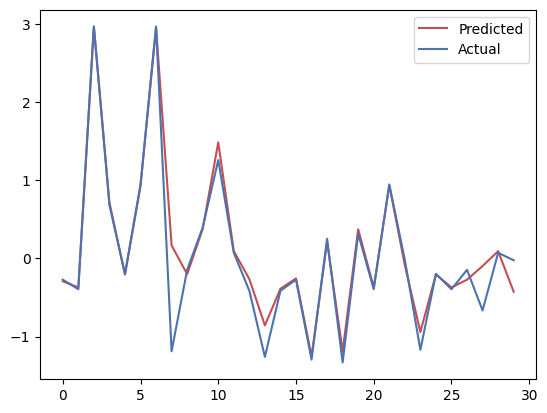

In [101]:
plt.plot(m.predict(X_test),color = 'r')
plt.plot(y_test,color = 'b')
plt.legend(['Predicted','Actual'])

In [102]:
fhnull = fh[fh['Fairing Height'].isna()]
frht = fhnull['Fairing Height']
not_null = fhnull.copy()
not_null.drop(columns='Fairing Height',inplace= True)
not_null = not_null[~not_null.isnull().any(axis = 1)]
final_fh = not_null.join(frht)
vals = m.predict(np.array(final_fh[['Rocket Height','Fairing Diameter','Liftoff Thrust']]))

In [103]:
vals = std_scaler.inverse_transform(vals.reshape(-1,1))

In [104]:
final_fh['Fairing Height'] = vals

In [105]:
#Replacing Null Values in Fairing Height
df['Fairing Height'] = df['Fairing Height'].fillna(final_fh['Fairing Height'])
df.isnull().sum()

Name                    0
Cmp                     0
Wiki                    9
Status                  0
Liftoff Thrust        116
Payload to LEO          0
Stages                  4
Strap-ons              20
Rocket Height          82
Price                 308
Payload to GTO          0
Fairing Diameter       65
Fairing Height        112
Lift_Thrust_ranges    118
dtype: int64

### Handling Null values in Straps-ons Using Rocket Height, Fairing Diameter, Fairing Height and Liftoff Thrust

<AxesSubplot:xlabel='Strap-ons', ylabel='Density'>

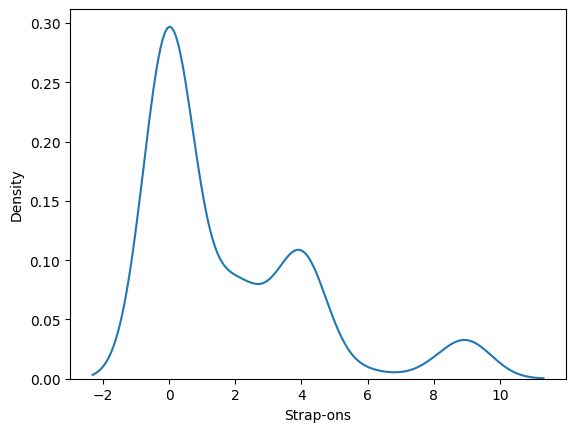

In [106]:
sns.kdeplot(df['Strap-ons'])

In [107]:
print("The standard deviation of strap-ons is: ",df['Strap-ons'].std())

The standard deviation of strap-ons is:  2.54343825501803


In [108]:
straps = df[['Strap-ons','Rocket Height','Fairing Diameter','Fairing Height','Liftoff Thrust']]
straps_notnull = straps[~straps.isnull().any(axis = 1)]
straps_notnull.head()

,Strap-ons,Rocket Height,Fairing Diameter,Fairing Height,Liftoff Thrust
0,0.0,39.0,2.979312,8.920248,3032.0
1,0.0,38.7,4.000000,10.228067,3130.0
2,0.0,28.0,2.078735,5.184159,1192.0
3,0.0,32.0,1.300000,5.141331,1192.0
4,0.0,23.0,1.669382,4.883295,135.0


<AxesSubplot:>

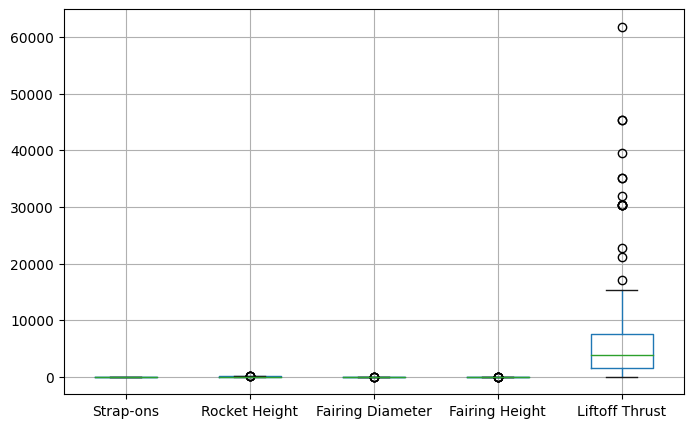

In [109]:
straps_notnull.boxplot(figsize = (8,5))

In [110]:
X = straps_notnull[['Rocket Height','Fairing Diameter','Fairing Height','Liftoff Thrust']]
y = straps_notnull['Strap-ons']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [111]:
def std_scaler(y_val):
    std_scl = StandardScaler()
    output = std_scl.fit_transform(y_val.values.reshape(-1,1))
    return output,std_scl

In [112]:
y_train,scaler = std_scaler(y_train)

In [113]:
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import (LinearRegression, ElasticNetCV, LassoCV,
                                 HuberRegressor,RANSACRegressor,TheilSenRegressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
evaluate = dict()
models = [DecisionTreeRegressor(), LinearRegression(),ElasticNetCV(), 
          RandomForestRegressor(), SVR(), XGBRegressor(),LGBMRegressor(),BayesianRidge(),
         LassoCV(),HuberRegressor(),RANSACRegressor(),TheilSenRegressor()]
for i in models:
    i.fit(X = X_train,y = y_train)
    pred = i.predict(X_test)
    evaluate[i] = mean_squared_error(y_test,pred)
    

In [115]:
m = CatBoostRegressor(verbose=0)
m.fit(X_train,y_train)
err = mean_squared_error(m.predict(X_test),y_test)

In [116]:
evaluate['Cat'] = err

In [117]:
mini = min(evaluate,key= evaluate.get)
if mini=='Cat':
    m = CatBoostRegressor(verbose=0)
else:
    m = mini
m.fit(X_train,y_train)

RandomForestRegressor()

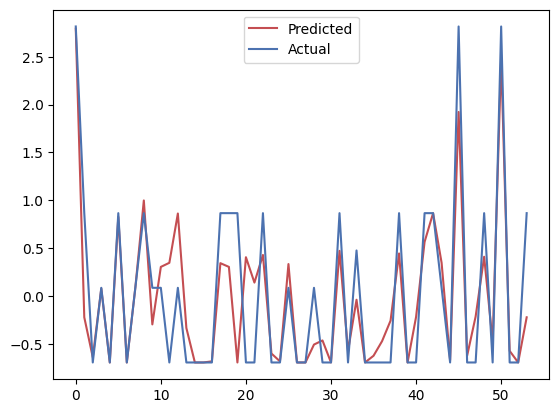

In [118]:
plt.plot([i for i in m.predict(X_test)],color = 'r')
plt.plot(y_test,color = 'b')
plt.legend(['Predicted','Actual'])

In [119]:
straps_null = straps[straps['Strap-ons'].isna()]
stp = straps_null['Strap-ons']
not_null = straps_null.copy()
not_null.drop(columns='Strap-ons',inplace= True)
not_null = not_null[~not_null.isnull().any(axis = 1)]
final_strp = not_null.join(stp)
vals = m.predict(np.array(final_strp[['Rocket Height',
                                      'Fairing Diameter',
                                      'Liftoff Thrust',
                                      'Fairing Height']]))
vals = np.array([x for x in vals])

In [120]:
vals = scaler.inverse_transform(vals.reshape(-1,1)).reshape(1,-1)

In [121]:
vals = [int(np.round(i)) for i in vals[0]]

In [122]:
final_strp['Strap-ons'] = vals

In [123]:
#Replacing Null Values in Strap-ons
df['Strap-ons'] = df['Strap-ons'].fillna(final_strp['Strap-ons'])
df.isnull().sum()

Name                    0
Cmp                     0
Wiki                    9
Status                  0
Liftoff Thrust        116
Payload to LEO          0
Stages                  4
Strap-ons               6
Rocket Height          82
Price                 308
Payload to GTO          0
Fairing Diameter       65
Fairing Height        112
Lift_Thrust_ranges    118
dtype: int64

### Handling Null Values in Liftoff Thrust

<Figure size 2000x1500 with 0 Axes>

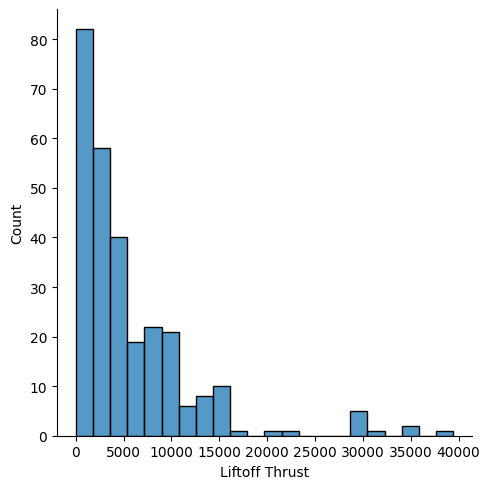

In [124]:
lift = df[['Rocket Height','Fairing Diameter','Fairing Height', 'Liftoff Thrust']]
lift_notnull = lift[~lift.isnull().any(axis = 1)]
plt.figure(figsize = (20,15))
sns.displot(data = (lift_notnull[
    lift_notnull['Liftoff Thrust']<lift_notnull['Liftoff Thrust'].quantile(0.99)]
                    ['Liftoff Thrust']))
plt.show()


In [125]:
lift_notnull[lift_notnull['Liftoff Thrust']>lift_notnull['Liftoff Thrust'].quantile(0.99)]

,Rocket Height,Fairing Diameter,Fairing Height,Liftoff Thrust
261,105.0,8.382769,5.441856,45400.0
262,105.0,8.382769,5.441856,45400.0
372,118.0,9.000000,5.441856,61800.0


In [126]:
lift_notnull = lift_notnull[lift_notnull['Liftoff Thrust']<lift_notnull['Liftoff Thrust'].quantile(0.99)]
lift_notnull.head()

,Rocket Height,Fairing Diameter,Fairing Height,Liftoff Thrust
0,39.0,2.979312,8.920248,3032.0
1,38.7,4.000000,10.228067,3130.0
2,28.0,2.078735,5.184159,1192.0
3,32.0,1.300000,5.141331,1192.0
4,23.0,1.669382,4.883295,135.0


<AxesSubplot:>

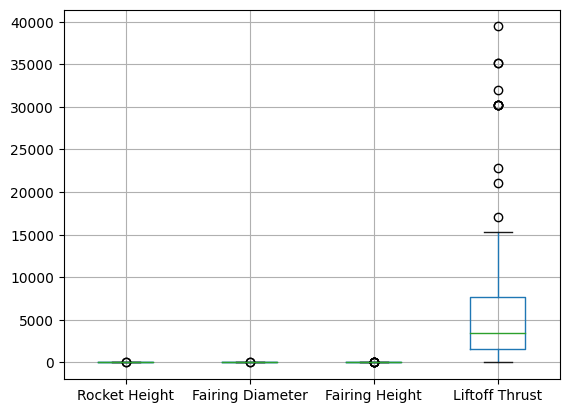

In [127]:
lift_notnull.boxplot()

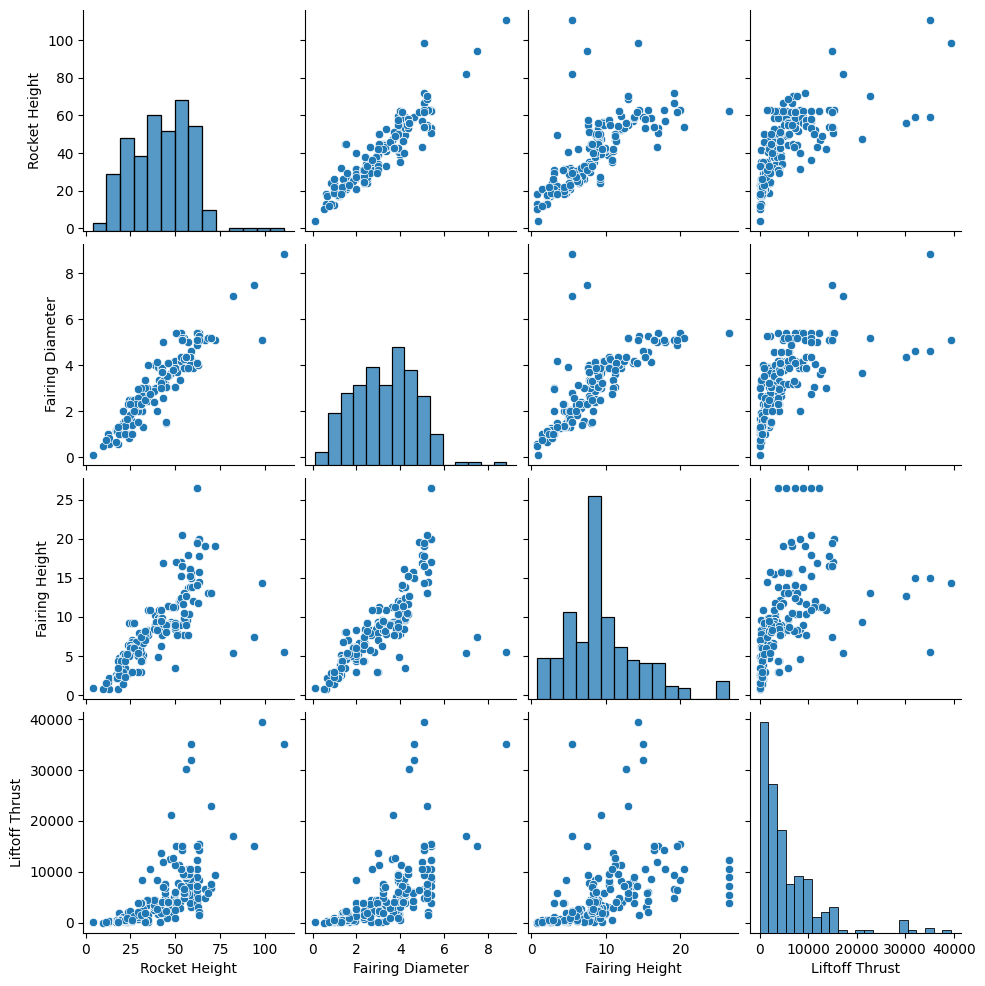

In [128]:
sns.pairplot(lift_notnull)

<AxesSubplot:xlabel='Liftoff Thrust', ylabel='Density'>

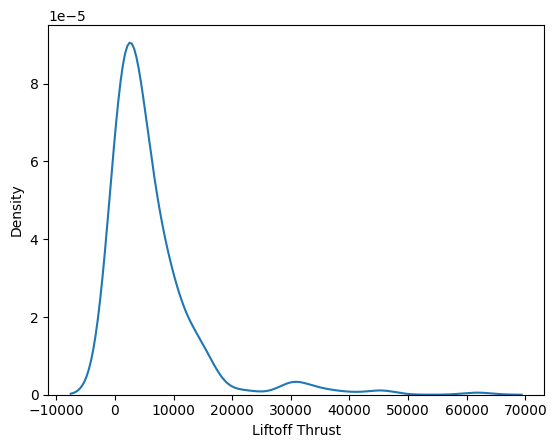

In [129]:
sns.kdeplot(df['Liftoff Thrust'])

In [130]:
print("The standard deviation of lift off thrust is: ",df['Liftoff Thrust'].std())

The standard deviation of lift off thrust is:  7880.477408080121


In [131]:
X = lift_notnull[['Rocket Height','Fairing Diameter','Fairing Height']]
y = lift_notnull['Liftoff Thrust']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [132]:
def std_scaler(y_val):
    std_scl = StandardScaler()
    output = std_scl.fit_transform(y_val.values.reshape(-1,1))
    return output,std_scl

In [133]:
y_train, scaler = std_scaler(y_train)

In [134]:
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [135]:
evaluate = dict()
models = [DecisionTreeRegressor(), LinearRegression(),ElasticNetCV(), 
          RandomForestRegressor(), SVR(), XGBRegressor(),LGBMRegressor(),BayesianRidge(),
         HuberRegressor(),LassoCV(),TheilSenRegressor(),RANSACRegressor()]
for i in models:
    i.fit(X = X_train,y = y_train)
    pred = i.predict(X_test)
    evaluate[i] = mean_squared_error(y_test,pred)

In [136]:
m = CatBoostRegressor(verbose=0)
m.fit(X_train,y_train)
err = mean_squared_error(m.predict(X_test),y_test)

In [137]:
evaluate['Cat'] = err

In [138]:
mini = min(evaluate,key= evaluate.get)
if mini=='Cat':
    m = CatBoostRegressor(verbose=0)
else:
    m = mini
m.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

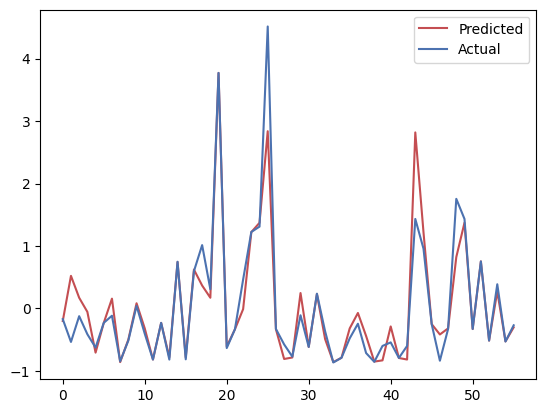

In [139]:
plt.plot([i for i in m.predict(X_test)],color = 'r')
plt.plot(y_test,color = 'b')
plt.legend(['Predicted','Actual'])

In [140]:
lift_null = lift[lift['Liftoff Thrust'].isna()]
lft = lift_null['Liftoff Thrust']
not_null = lift_null.copy()
not_null.drop(columns='Liftoff Thrust',inplace= True)
not_null = not_null[~not_null.isnull().any(axis = 1)]
final_lft = not_null.join(lft)
vals = m.predict(np.array(final_lft[['Rocket Height',
                                      'Fairing Diameter',
                                      'Fairing Height']]))
vals = np.array([x for x in vals])

In [141]:
vals = scaler.inverse_transform(vals.reshape(-1,1)).reshape(1,-1)

In [142]:
final_lft['Liftoff Thrust'] = vals.reshape(-1,1)

In [143]:
#Replacing Null Values in Lift off Thrust
df['Liftoff Thrust'] = df['Liftoff Thrust'].fillna(final_strp['Liftoff Thrust'])
df.isnull().sum()

Name                    0
Cmp                     0
Wiki                    9
Status                  0
Liftoff Thrust        116
Payload to LEO          0
Stages                  4
Strap-ons               6
Rocket Height          82
Price                 308
Payload to GTO          0
Fairing Diameter       65
Fairing Height        112
Lift_Thrust_ranges    118
dtype: int64

### Other Visualizations

<AxesSubplot:xlabel='Rocket Height', ylabel='Liftoff Thrust'>

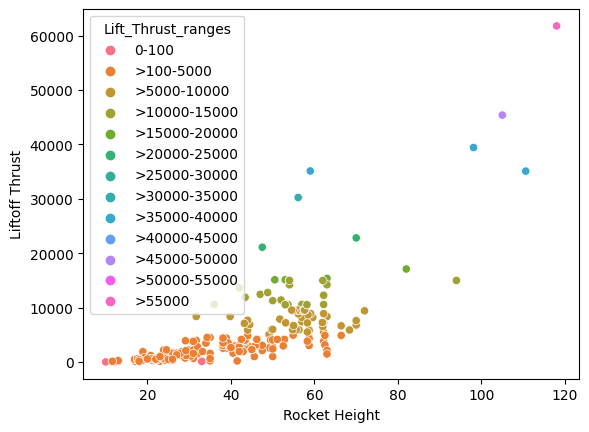

In [144]:
sns.scatterplot(df['Rocket Height'],df['Liftoff Thrust'],hue=df['Lift_Thrust_ranges'])

**More Rocket Heights Means More Lift off Thrust Required**

**Most of the rockets have lift off thrust ranging between >100-5000**

In [145]:
largest_thrust = df.nlargest(columns='Liftoff Thrust', n =50)

Text(0.5, 1.0, 'Companies That Produced Rockets With Insane Thrust')

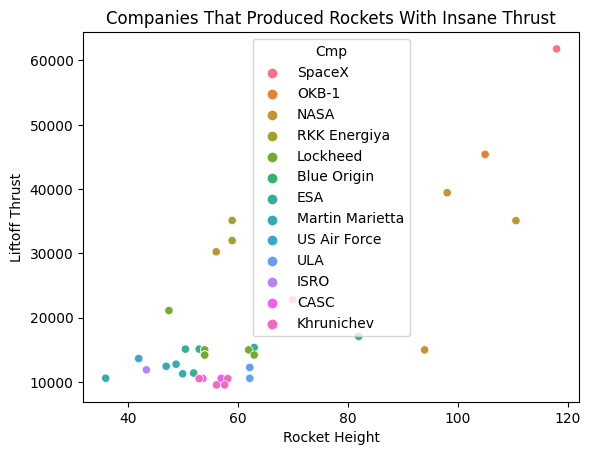

In [146]:
sns.scatterplot(largest_thrust['Rocket Height'],largest_thrust['Liftoff Thrust'],hue = largest_thrust['Cmp'])
plt.title('Companies That Produced Rockets With Insane Thrust')

Text(0.5, 1.0, 'No of big rockets made/planned by the companies')

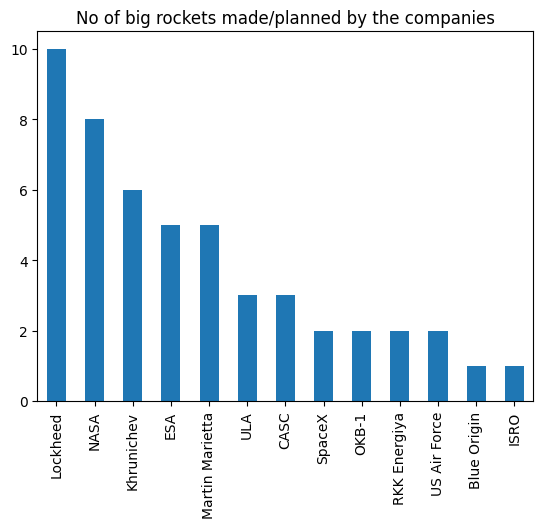

In [147]:
largest_thrust['Cmp'].value_counts().plot(kind = 'bar')
plt.title('No of big rockets made/planned by the companies')

Text(0.5, 1.0, 'Companies That Produced/Planned Small Rockets')

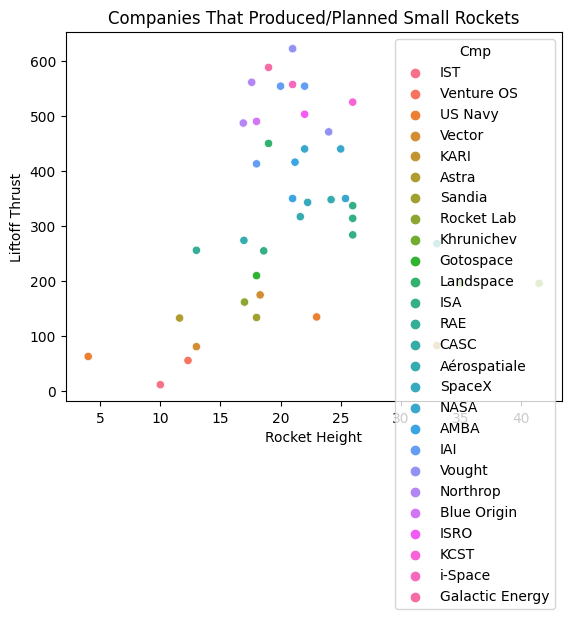

In [148]:
small_thrust = df.nsmallest(columns='Liftoff Thrust', n =50)
sns.scatterplot(small_thrust['Rocket Height'],small_thrust['Liftoff Thrust'],hue = small_thrust['Cmp'])
plt.title('Companies That Produced/Planned Small Rockets')

Text(0.5, 1.0, 'No of small rockets made/planned by the companies')

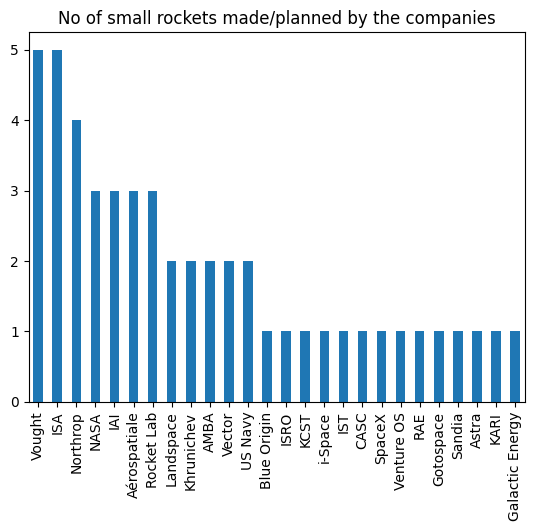

In [149]:
small_thrust['Cmp'].value_counts().plot(kind = 'bar')
plt.title('No of small rockets made/planned by the companies')

In [150]:
gto = df[df['Payload to GTO']>0].groupby('Status')['Cmp'].value_counts().unstack(level = 0)
gto.columns.name = None

<AxesSubplot:title={'center':'Companies GTO Achievements'}, xlabel='Cmp'>

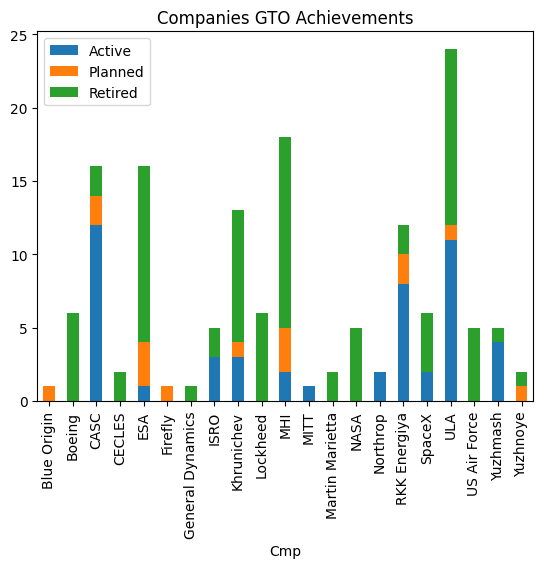

In [151]:
gto.plot(kind = 'bar',stacked = True,title = 'Companies GTO Achievements')

**Many of the GTO rocekts can be seen retiring?? Do GTO Rockets have short life span due to high fatigue and impact??**

**China Aerospace Science and Technology Corporation (CASC) has the highest number of active rockets capable for GTO**

In [152]:
leo = df[df['Payload to LEO']>0].groupby('Status')['Cmp'].value_counts().unstack(level = 0)
leo.columns.name = None

<AxesSubplot:title={'center':'Companies LEO Achievements'}, xlabel='Cmp'>

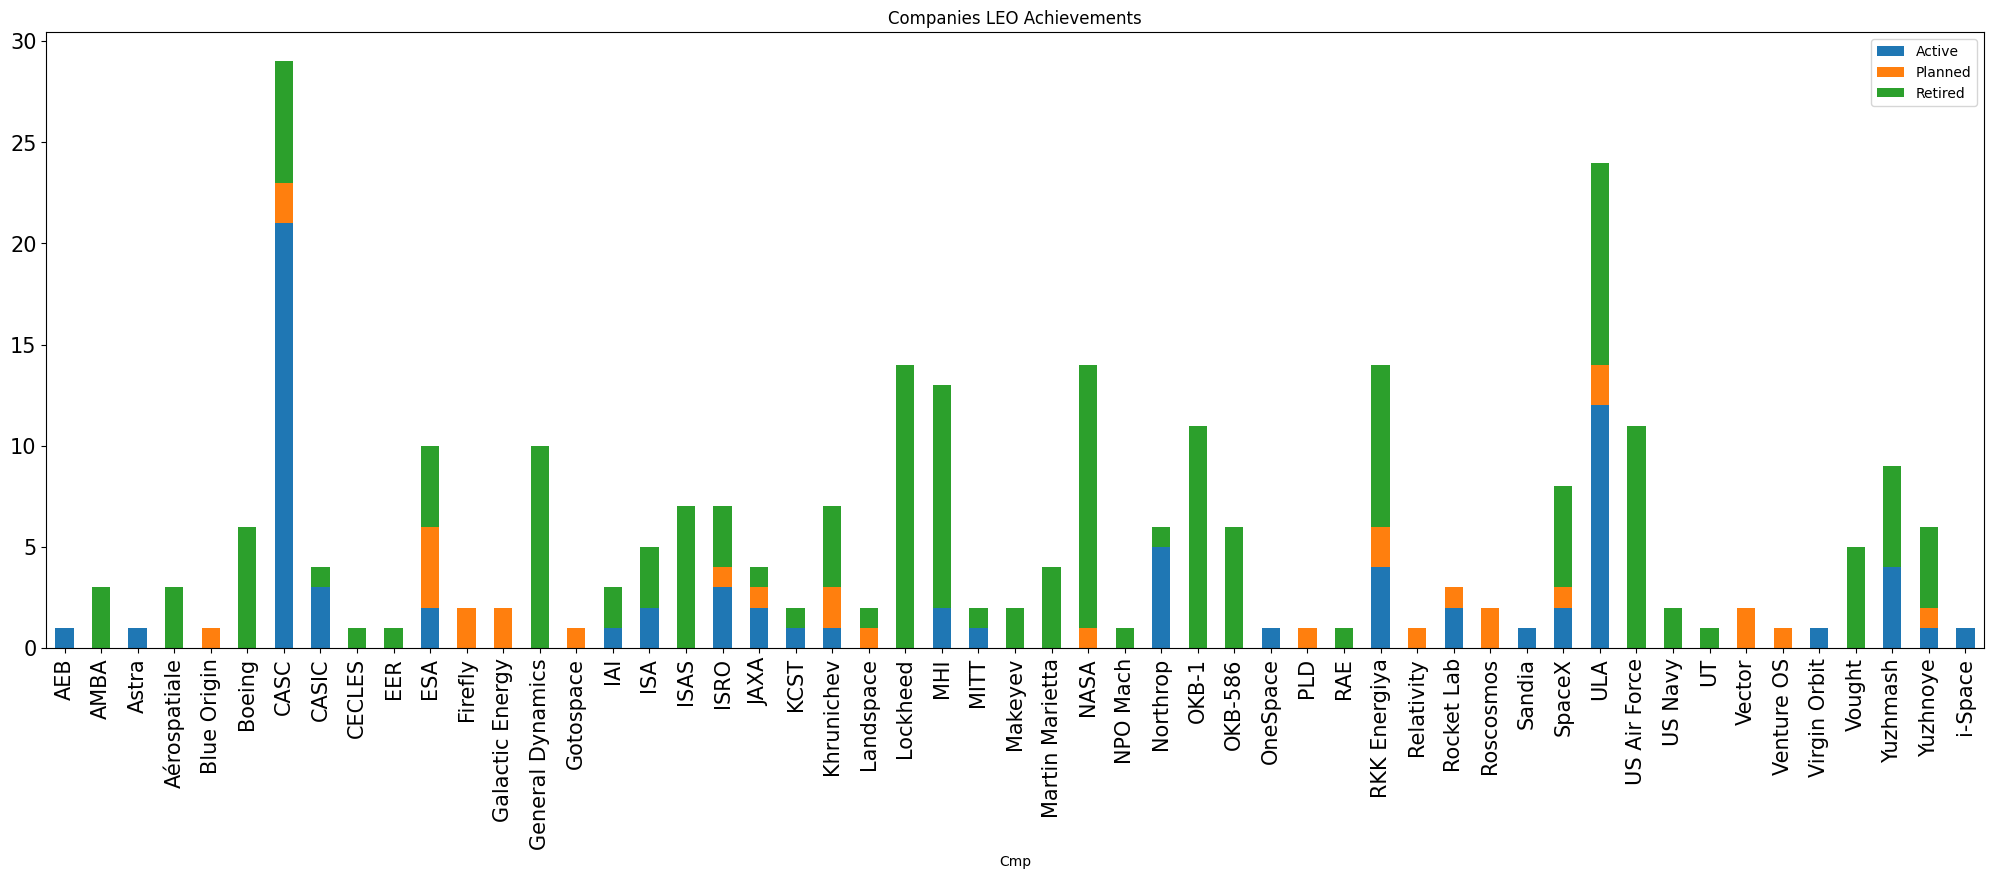

In [153]:
leo.plot(kind = 'bar',stacked = True,title = 'Companies LEO Achievements',figsize = (25,8),fontsize = 15)

**LEO Rockets are also retiring quite fast**

**China Aerospace Science and Technology Corporation (CASC) has the highest number of active rockets to LEO**